<a href="https://colab.research.google.com/github/rosidijourneycode/Modeling-Loan-Charge-Off-with-ANN/blob/main/Skripsi_Loan_Charge_Off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install association-metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3930 sha256=79556f89fa890a5ee5504c032e43816addab46aaabd7ef9c5cefa98f72daf796
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association-metrics


In [ ]:
# Magic function that will make your plot outputs appear and be stored within the notebook
%matplotlib inline

# Function used to to render higher resolution images
%config InlineBackend.figure_format = 'retina'

# Data manipulasi pada dataset
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import missingno as msno

# Standardizing the style for the visualizations
sns.set_theme()
sns.set(font_scale=1.2)
sns.set_palette("pastel")
plt.style.use('seaborn-whitegrid')

# Feature selection dan data preprocessing dan One  Hot Encoder
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder)
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
import association_metrics as am

# Machine learning models, MixMax Scaler Keperluan Artifical Neural Network
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import (Sequential, Model)
from tensorflow.keras.layers import (Dense, Dropout)
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report)


# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

<ipython-input-2-9e88c9d7834b>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
# Membaca Dataset

df = pd.read_csv("/content/accepted_2007_to_2018Q4.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37533 entries, 0 to 37532
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          int64  
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc    

In [ ]:
len(df)

37533

In [ ]:
#Inspecting "loan_status" column unique values

df["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [ ]:
# Isolating values of interest from the target column

target_loan= ["Fully Paid","Charged Off"]
df=df[df["loan_status"].isin(target_loan)]

In [ ]:
#Menjaga Data kurang dari 20% Missing Nulls / nilai Kosong

features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 20)].to_list()
features_to_keep

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

In [ ]:
# Total columns in the dataset after missing value threshold purge

len(features_to_keep)

93

In [ ]:
# Feature Selection pada data dengan memakai 20 data yang penting

trim=["addr_state","annual_inc","dti","emp_length","fico_range_high","fico_range_low",
     "grade","home_ownership","installment","int_rate","loan_amnt","loan_status","mort_acc",
     "open_acc","pub_rec_bankruptcies","purpose","revol_util","sub_grade","term","total_acc"]

In [ ]:
# Total features selected

len(trim)

20

In [ ]:
# Creating a new DataFrame with the selected features

df_trim=df[trim]

In [ ]:
# First 5 instances of the new DataFrame

df_trim.head(5)

,addr_state,annual_inc,dti,emp_length,fico_range_high,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,total_acc
0,PA,55000.0,5.91,10+ years,679.0,675.0,C,MORTGAGE,123.03,13.99,3600.0,Fully Paid,1.0,7.0,0.0,debt_consolidation,29.7,C4,36 months,13.0
1,SD,65000.0,16.06,10+ years,719.0,715.0,C,MORTGAGE,820.28,11.99,24700.0,Fully Paid,4.0,22.0,0.0,small_business,19.2,C1,36 months,38.0
2,IL,63000.0,10.78,10+ years,699.0,695.0,B,MORTGAGE,432.66,10.78,20000.0,Fully Paid,5.0,6.0,0.0,home_improvement,56.2,B4,60 months,18.0
4,PA,104433.0,25.37,3 years,699.0,695.0,F,MORTGAGE,289.91,22.45,10400.0,Fully Paid,6.0,12.0,0.0,major_purchase,64.5,F1,60 months,35.0
5,GA,34000.0,10.20,4 years,694.0,690.0,C,RENT,405.18,13.44,11950.0,Fully Paid,0.0,5.0,0.0,debt_consolidation,68.4,C3,36 months,6.0


In [ ]:
# Last 5 instances of the new DataFrame

df_trim.tail(5)

,addr_state,annual_inc,dti,emp_length,fico_range_high,fico_range_low,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,pub_rec_bankruptcies,purpose,revol_util,sub_grade,term,total_acc
37528,NY,110000.0,15.56,10+ years,679.0,675.0,C,MORTGAGE,352.77,14.48,15000.0,Fully Paid,1.0,26.0,0.0,home_improvement,18.0,C5,60 months,32.0
37529,TX,165000.0,11.69,2 years,754.0,750.0,B,MORTGAGE,323.45,10.64,15000.0,Charged Off,1.0,13.0,0.0,home_improvement,28.4,B4,60 months,27.0
37530,VA,60000.0,11.49,< 1 year,704.0,700.0,C,RENT,225.44,12.59,10000.0,Fully Paid,0.0,12.0,0.0,credit_card,38.6,C2,60 months,15.0
37531,TX,48500.0,16.46,5 years,684.0,680.0,D,RENT,539.90,17.86,21325.0,Fully Paid,0.0,10.0,0.0,debt_consolidation,58.6,D5,60 months,20.0
37532,VA,140000.0,23.77,10+ years,689.0,685.0,A,MORTGAGE,1095.00,7.89,35000.0,Fully Paid,5.0,11.0,NaN,credit_card,52.0,A5,36 months,25.0


In [ ]:
# Creating a table of unique value counts of the selected features

dict = {}
for i in list(df_trim.columns):
    dict[i] = df_trim[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique value count"]).transpose().sort_values(by=["unique value count"], ascending=False)

,unique value count
installment,8479
dti,3909
annual_inc,3248
loan_amnt,1206
revol_util,1055
total_acc,94
int_rate,64
open_acc,54
addr_state,49
fico_range_low,38


In [ ]:
# Descriptive statistics of the DataFrame we are currently working on

df_trim.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,33051.0,78380.481900,79023.077685,0.00,47868.000,65400.00,95000.00,8700000.00
dti,33050.0,19.160233,10.299185,0.00,12.490,18.63,25.40,999.00
fico_range_high,33051.0,698.669178,31.435037,664.00,674.000,689.00,714.00,850.00
fico_range_low,33051.0,694.668996,31.434166,660.00,670.000,685.00,710.00,845.00
installment,33051.0,429.030312,254.989361,30.54,243.635,369.93,572.19,1354.66
int_rate,33051.0,11.994216,4.206264,5.32,9.170,11.48,14.48,28.99
loan_amnt,33051.0,14339.427703,8634.321408,1000.00,7675.000,12000.00,20000.00,35000.00
mort_acc,33051.0,1.640313,1.945941,0.00,0.000,1.00,3.00,25.00
open_acc,33051.0,12.024961,5.706652,1.00,8.000,11.00,15.00,67.00
pub_rec_bankruptcies,33050.0,0.141392,0.394533,0.00,0.000,0.00,0.00,8.00


Text(0.5, 1.0, 'Jumlah Loan Status')

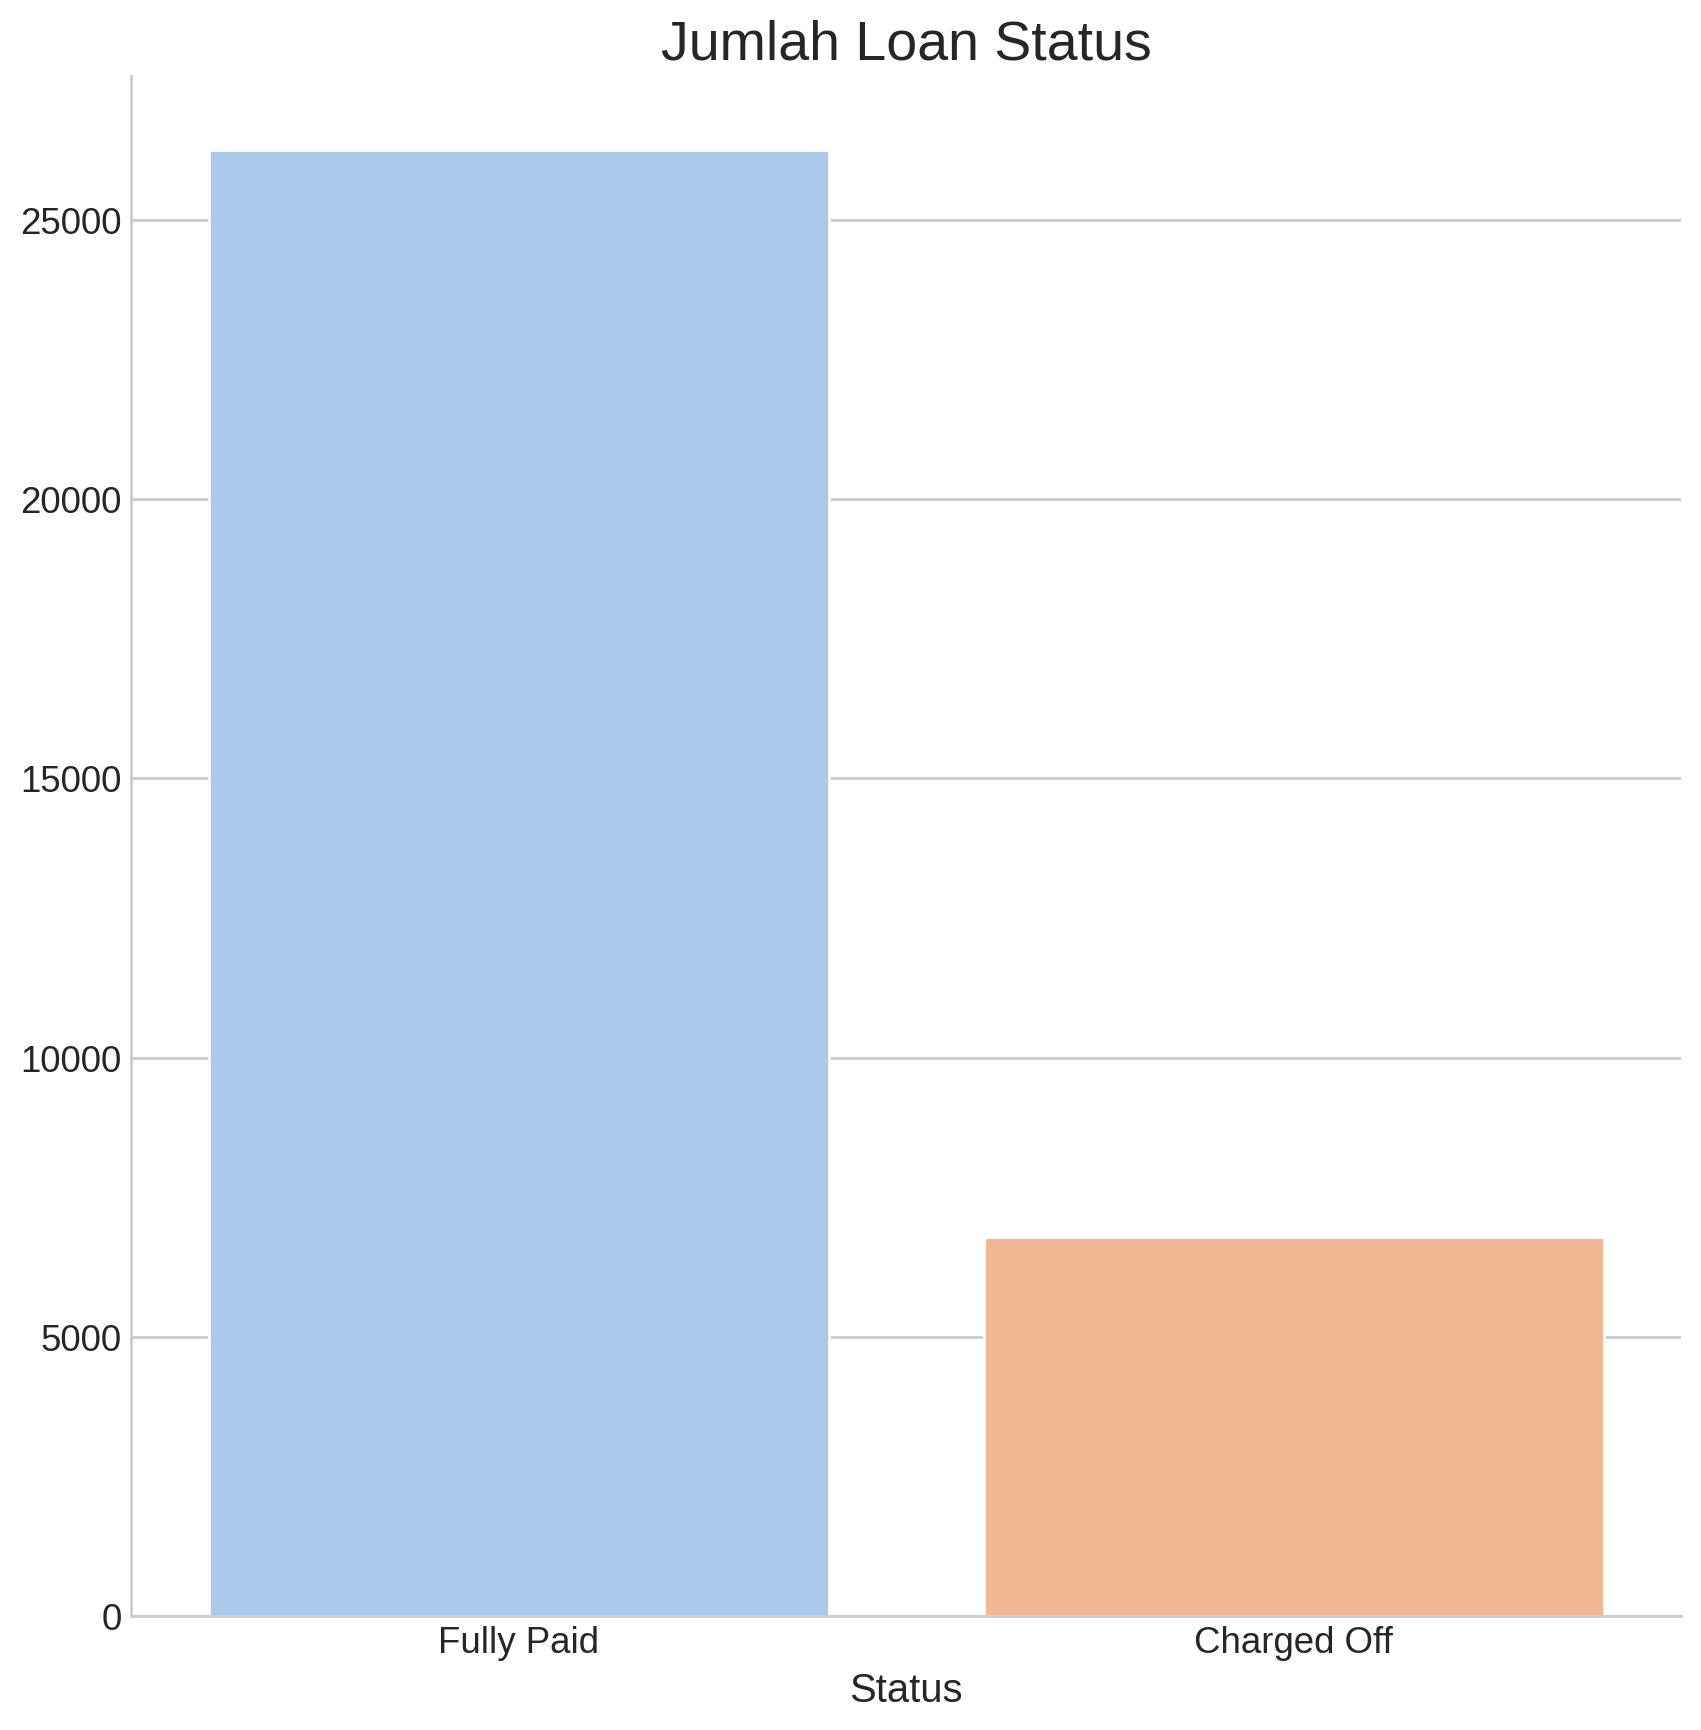

In [ ]:
# Loan status (target) value balance visualization

fig, ax =plt.subplots(figsize=(10,10))
sns.despine()
sns.countplot(data=df_trim,x="loan_status")
ax.set(xlabel='Status', ylabel='')
ax.set_title('Jumlah Loan Status', size=20)

Text(0.5, 1.0, 'Lama Pekerjaan')

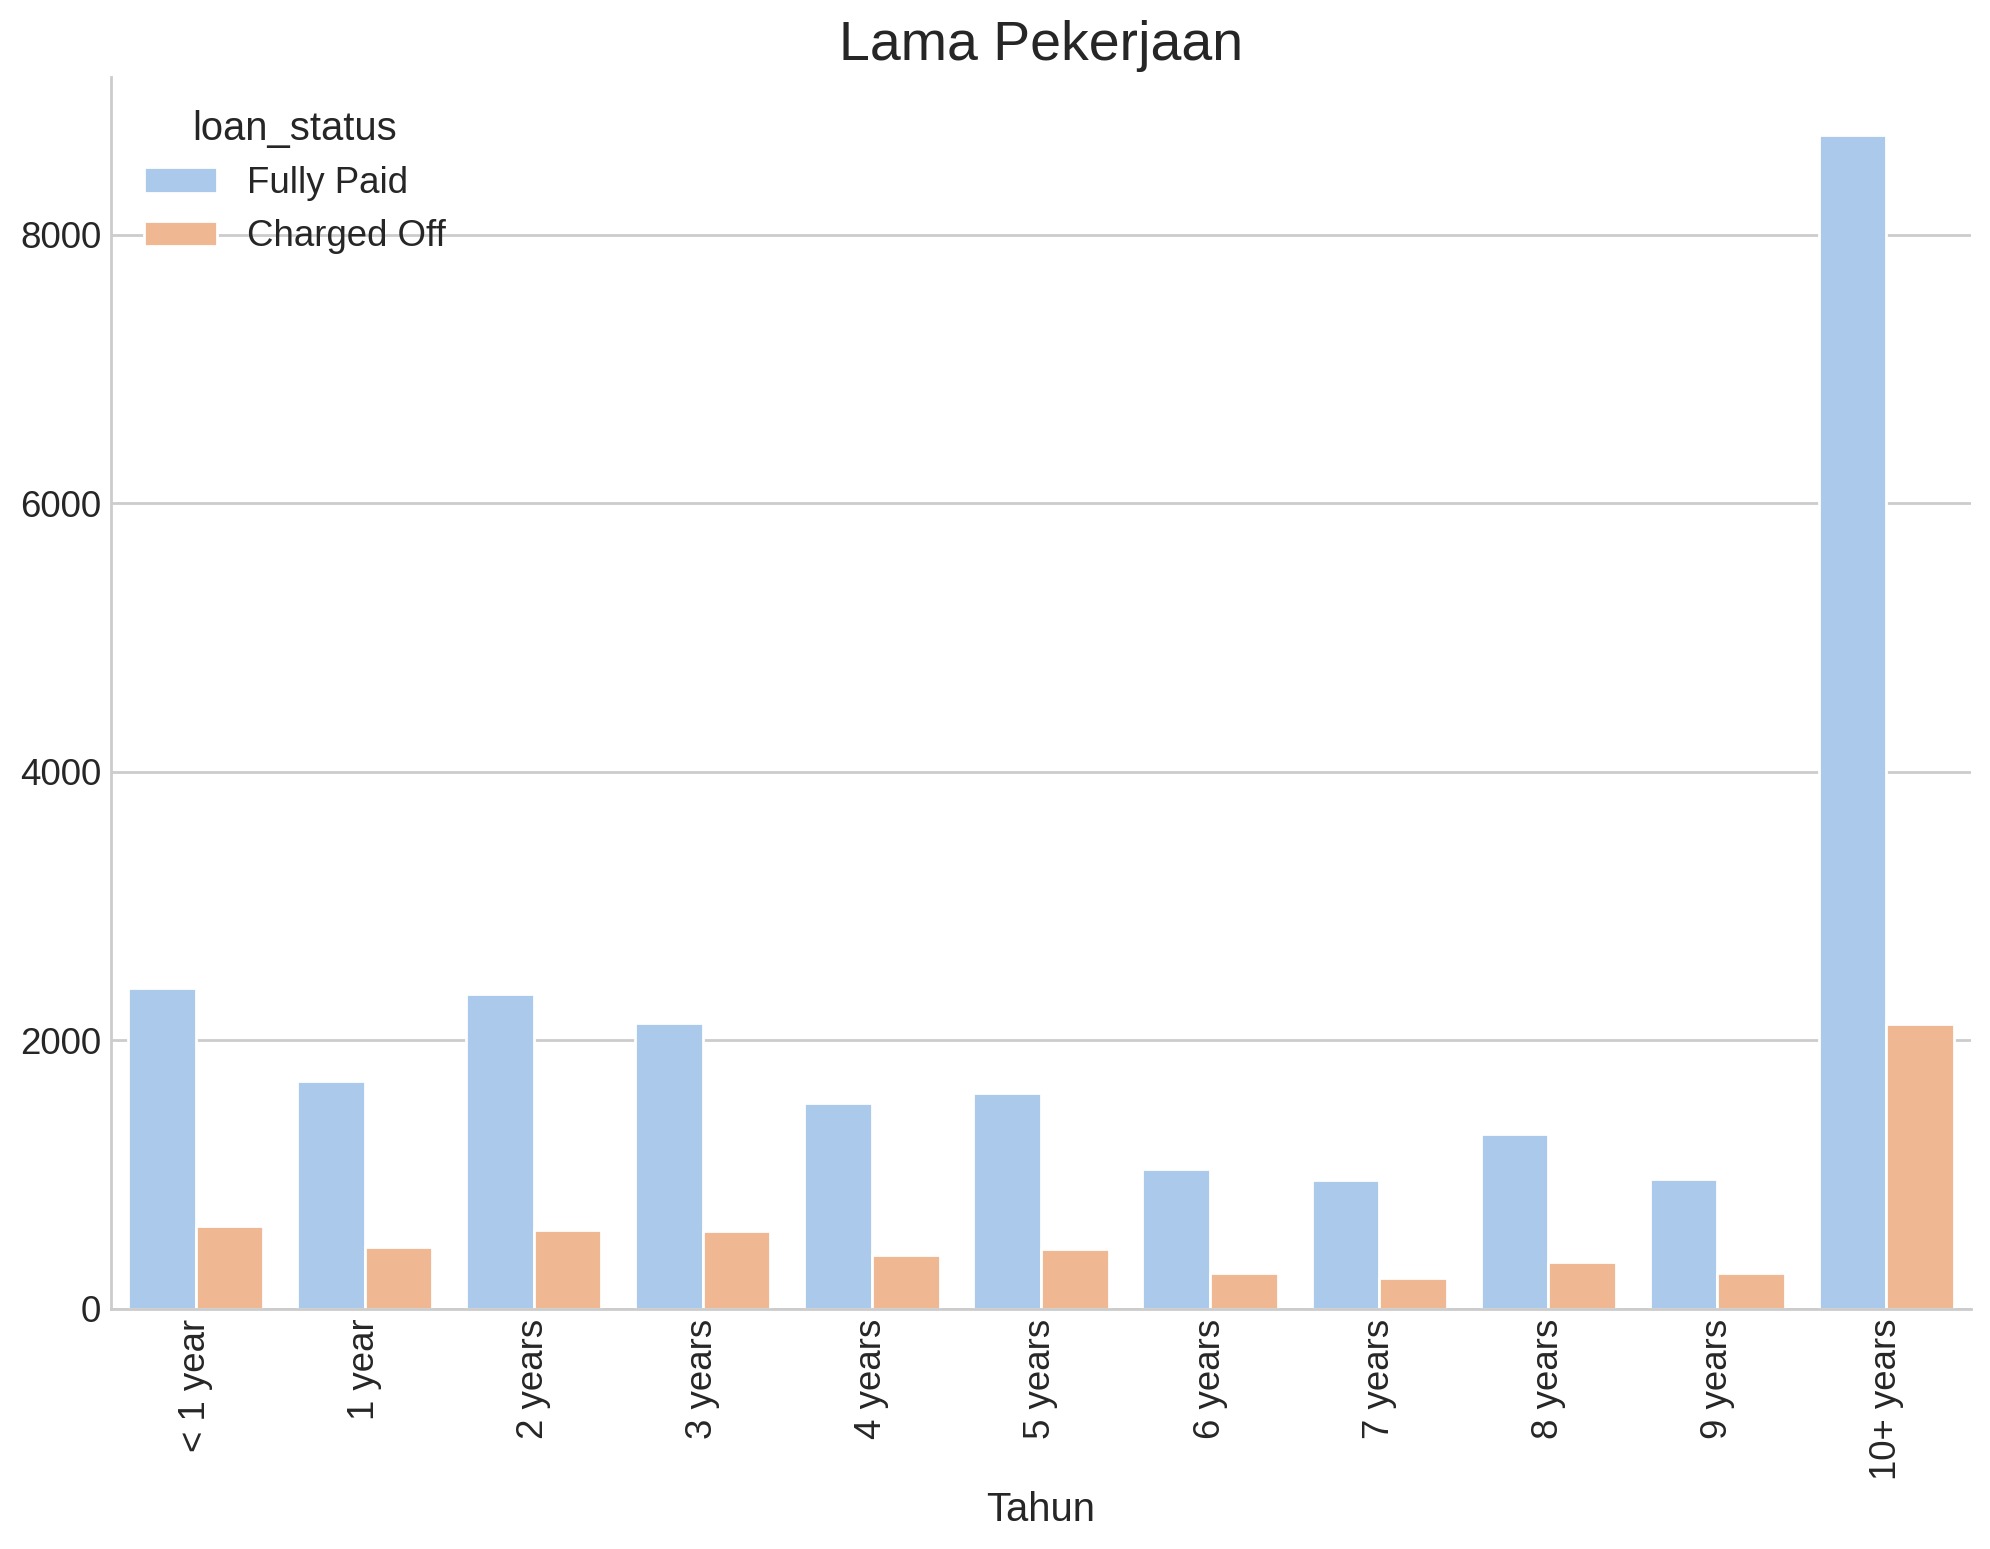

In [ ]:
# Employment length count by loan status

fig, ax =plt.subplots(figsize=(12,8))
sns.despine()
order=["< 1 year", "1 year","2 years", "3 years", "4 years", "5 years",
      "6 years", "7 years", "8 years", "9 years", "10+ years"]
sns.countplot(data=df_trim,x="emp_length",hue="loan_status",order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Tahun', ylabel='')
ax.set_title('Lama Pekerjaan', size=20)

Text(0.5, 1.0, 'Jangka Waktu Pinjaman')

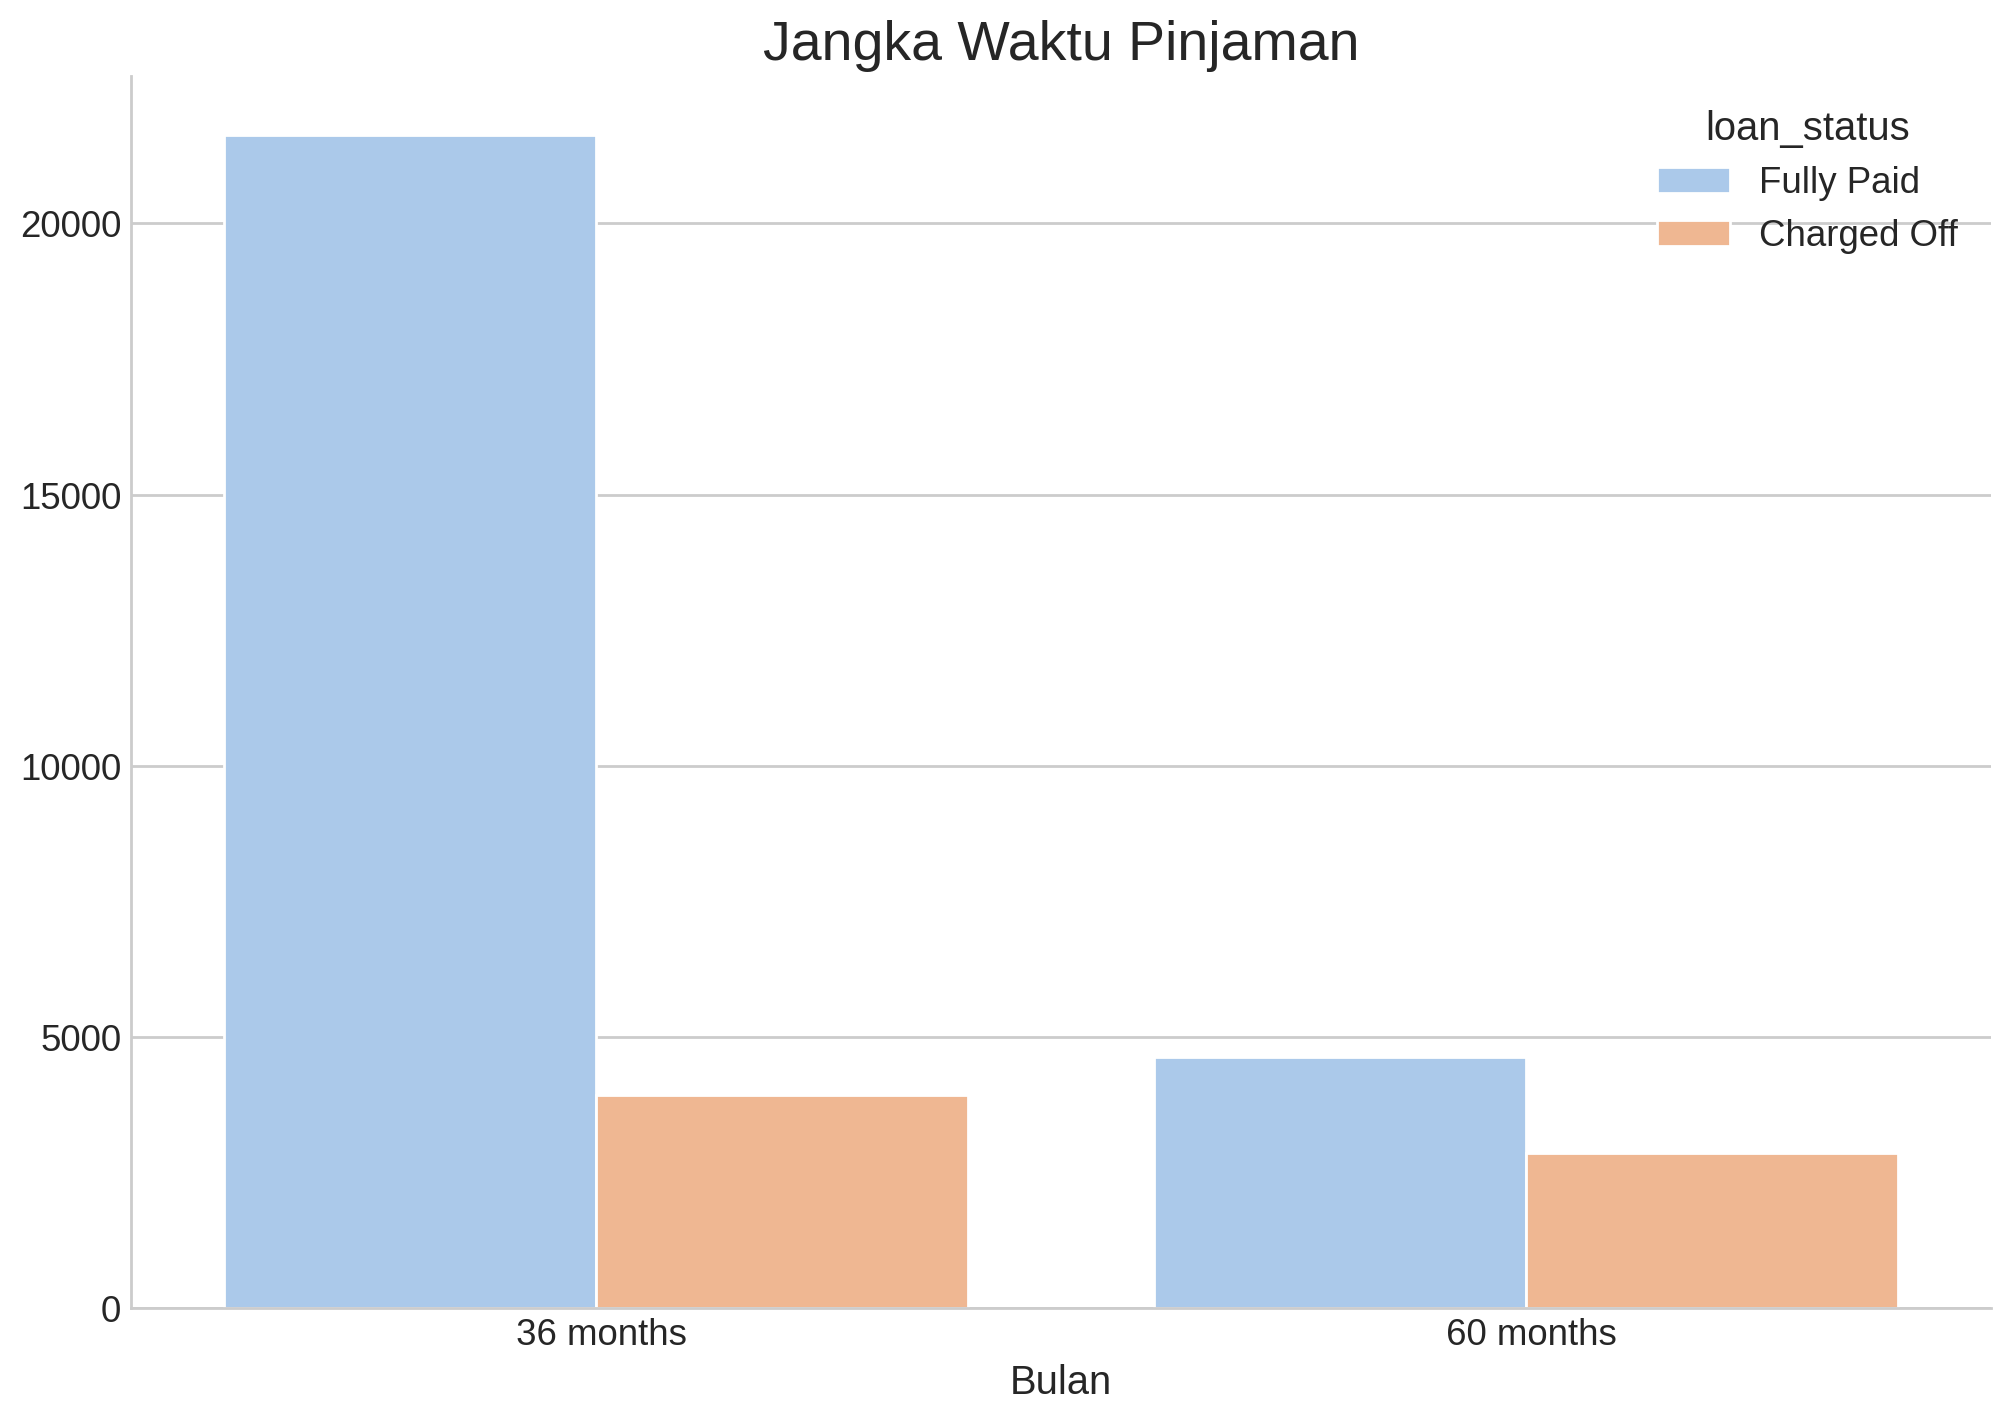

In [ ]:
# Term count by loan status

fig, ax =plt.subplots(figsize=(12,8))
sns.despine()
order=sorted(df["term"].unique())
sns.countplot(data=df_trim,x="term",hue="loan_status",order=order)
ax.tick_params(axis='x', labelrotation=0)
ax.set(xlabel='Bulan', ylabel='')
ax.set_title('Jangka Waktu Pinjaman', size=20)

In [ ]:
# Encoding target values to dummy values

df_trim['loan_status'] = df_trim['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
df_trim['loan_status']

0        1
1        1
2        1
4        1
5        1
        ..
37528    1
37529    0
37530    1
37531    1
37532    1
Name: loan_status, Length: 33051, dtype: int64

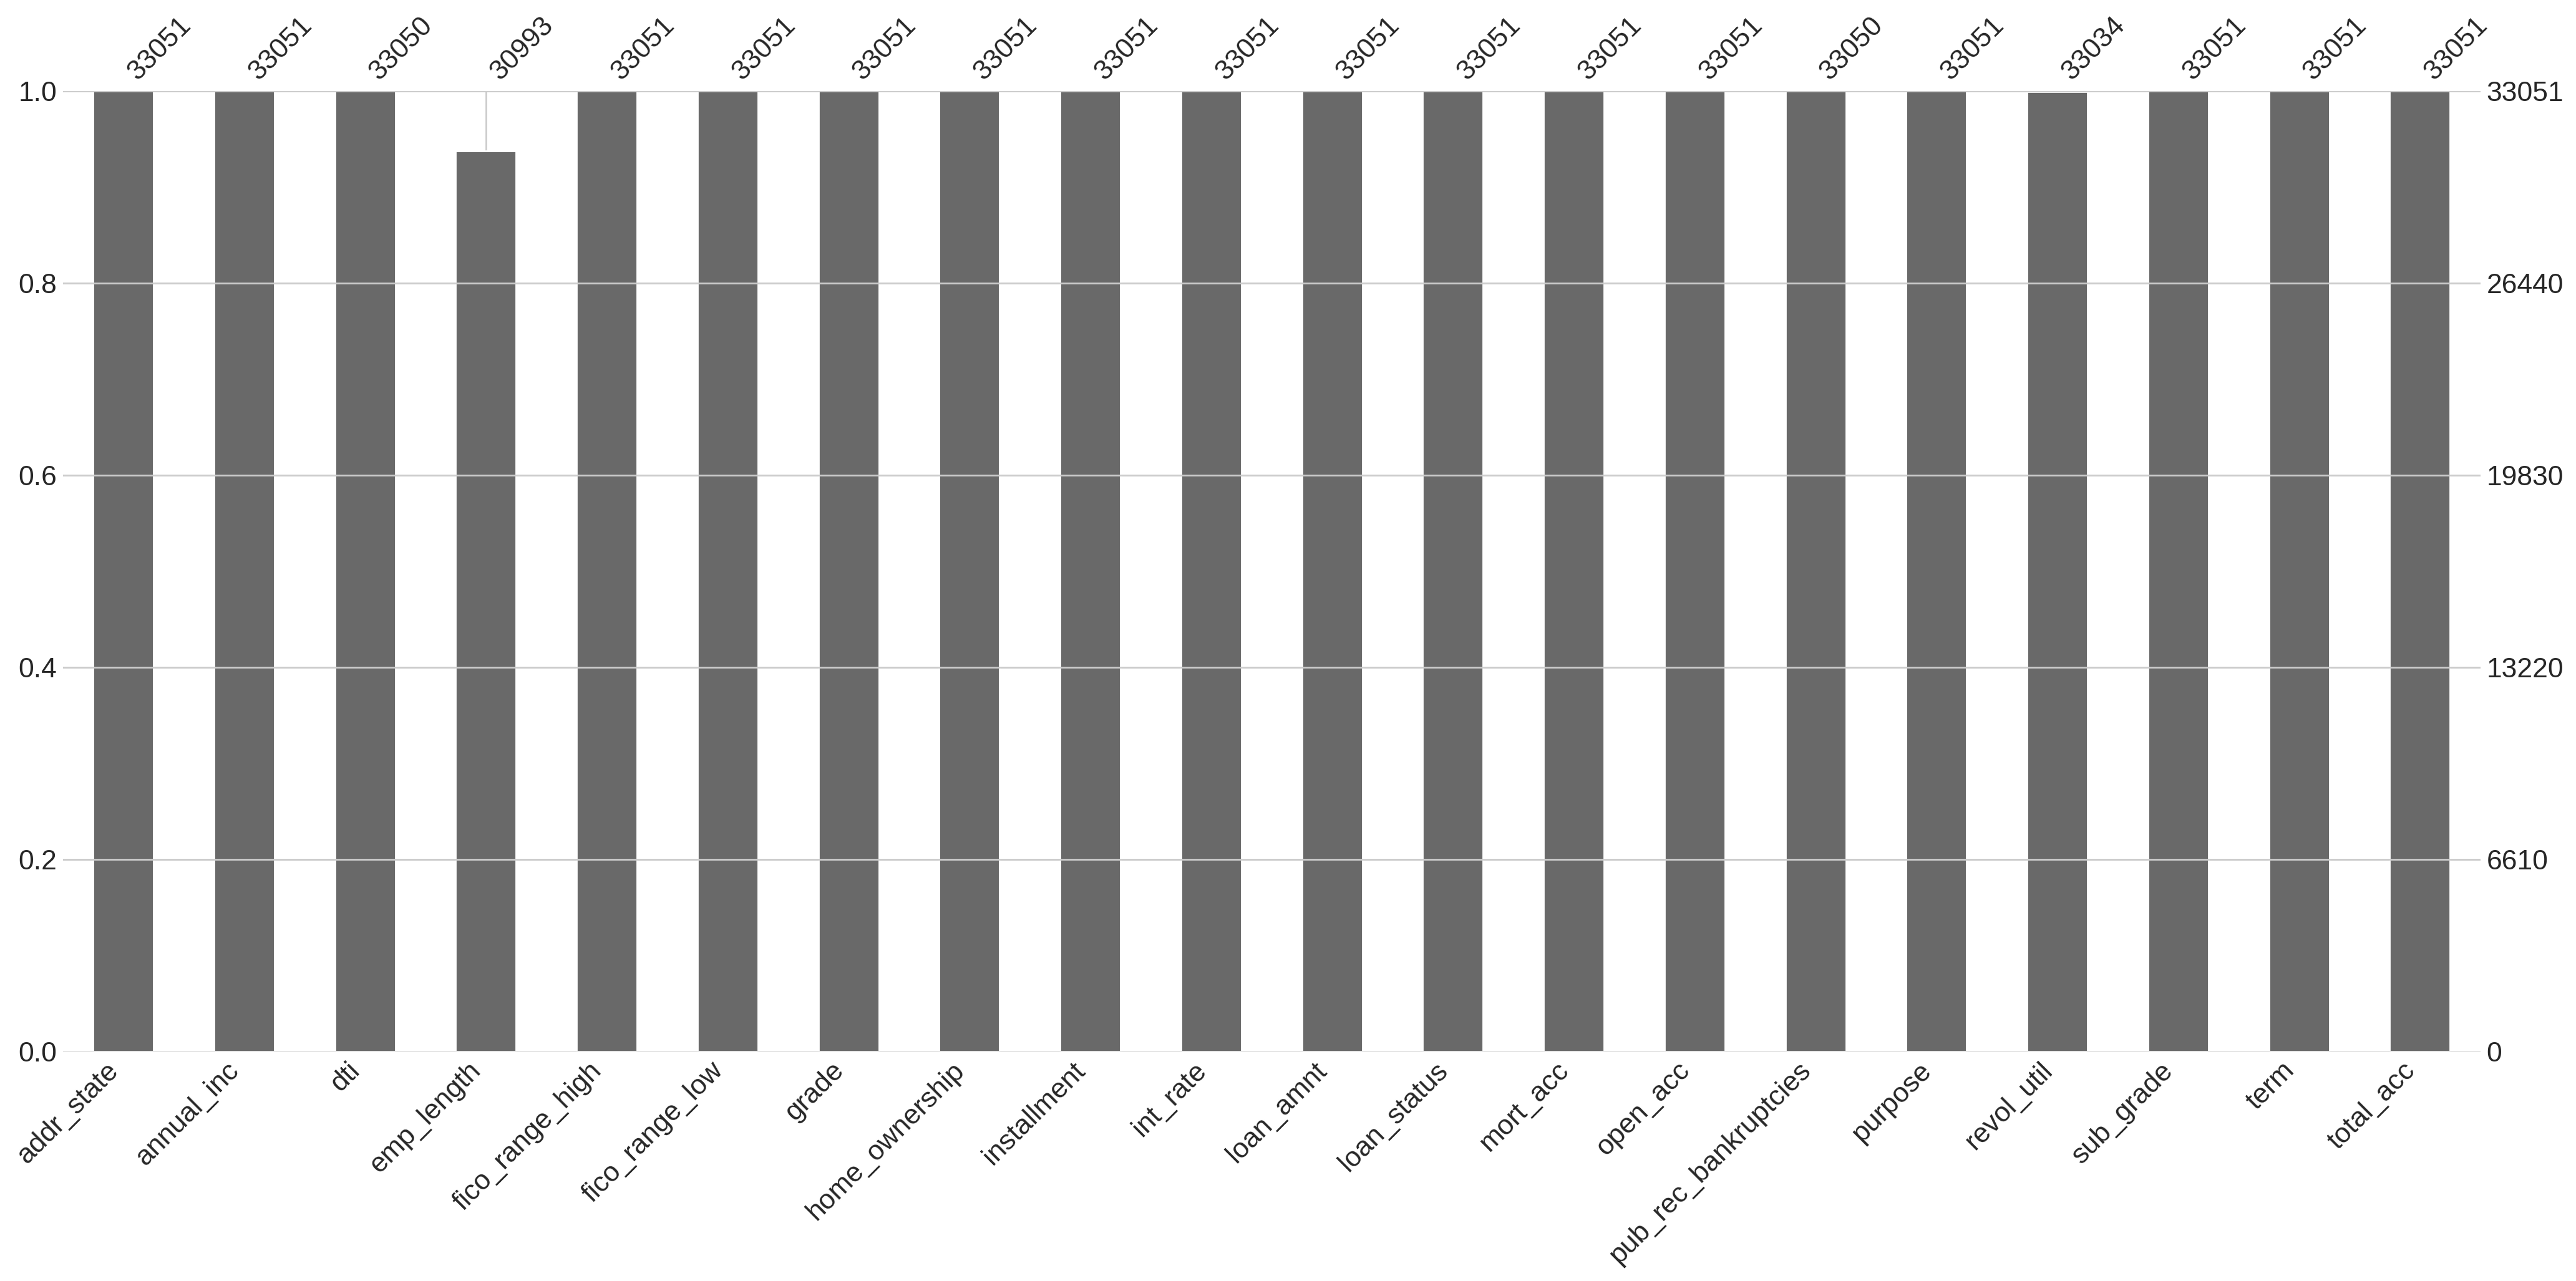

In [ ]:
# Barplot visualization of missing values per feature

ax=msno.bar(df_trim)

In [ ]:
# Table showing # of missing values and % of missing values in the current dataset

dict = {}
for i in list(df_trim.columns):
    dict[i] = (df_trim[i].isnull().sum(),round(df_trim[i].isnull().sum()/len(df_trim)*100,2))

pd.DataFrame(dict,index=["# of missing values","% of missing values"]).transpose().sort_values(by=["# of missing values"], ascending=False)

,# of missing values,% of missing values
emp_length,2058.0,6.23
revol_util,17.0,0.05
dti,1.0,0.00
pub_rec_bankruptcies,1.0,0.00
addr_state,0.0,0.00
loan_status,0.0,0.00
term,0.0,0.00
sub_grade,0.0,0.00
purpose,0.0,0.00
open_acc,0.0,0.00


In [ ]:
# Imputing mort_acc and emp_length feature

imp1= SimpleImputer(missing_values=np.nan, strategy='mean') # Filling missing values w/ column mean
df_trim["mort_acc"]=imp1.fit_transform(df_trim[["mort_acc"]])

imp2= SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Filling missing values w/ column most frequent category
df_trim["emp_length"]=imp2.fit_transform(df_trim[["emp_length"]])

In [ ]:
# Dropping the rest of missing values in the Dataset

df_trim=df_trim.dropna()

In [ ]:
# Missing values count and % verification

dict = {}
for i in list(df_trim.columns):
    dict[i] = (df_trim[i].isnull().sum(),round(df_trim[i].isnull().sum()/len(df_trim)*100,2))

pd.DataFrame(dict,index=["# of missing values","% of missing values"]).transpose().sort_values(by=["# of missing values"], ascending=False)

,# of missing values,% of missing values
addr_state,0.0,0.0
annual_inc,0.0,0.0
term,0.0,0.0
sub_grade,0.0,0.0
revol_util,0.0,0.0
purpose,0.0,0.0
pub_rec_bankruptcies,0.0,0.0
open_acc,0.0,0.0
mort_acc,0.0,0.0
loan_status,0.0,0.0


In [ ]:
# Charge off % variance across dataset features

per_charge_off = {}
for i in list(df_trim.columns):
    ratio = df_trim[df_trim['loan_status'] == 0][i].value_counts() / df_trim[df_trim['loan_status'] == 1][i].value_counts()
    per_charge_off[i] = ratio.var()

pd.DataFrame(per_charge_off,index=["% Charge off ratio variation"]).transpose().sort_values(by=["% Charge off ratio variation"], ascending=False)

,% Charge off ratio variation
int_rate,1.028908
sub_grade,0.870430
loan_amnt,0.372671
installment,0.369549
grade,0.271793
dti,0.196717
annual_inc,0.196269
term,0.095515
pub_rec_bankruptcies,0.087190
open_acc,0.084841


<Axes: title={'center': 'Charge-off % by Employment length'}, xlabel='Employment length', ylabel='Charge-off %'>

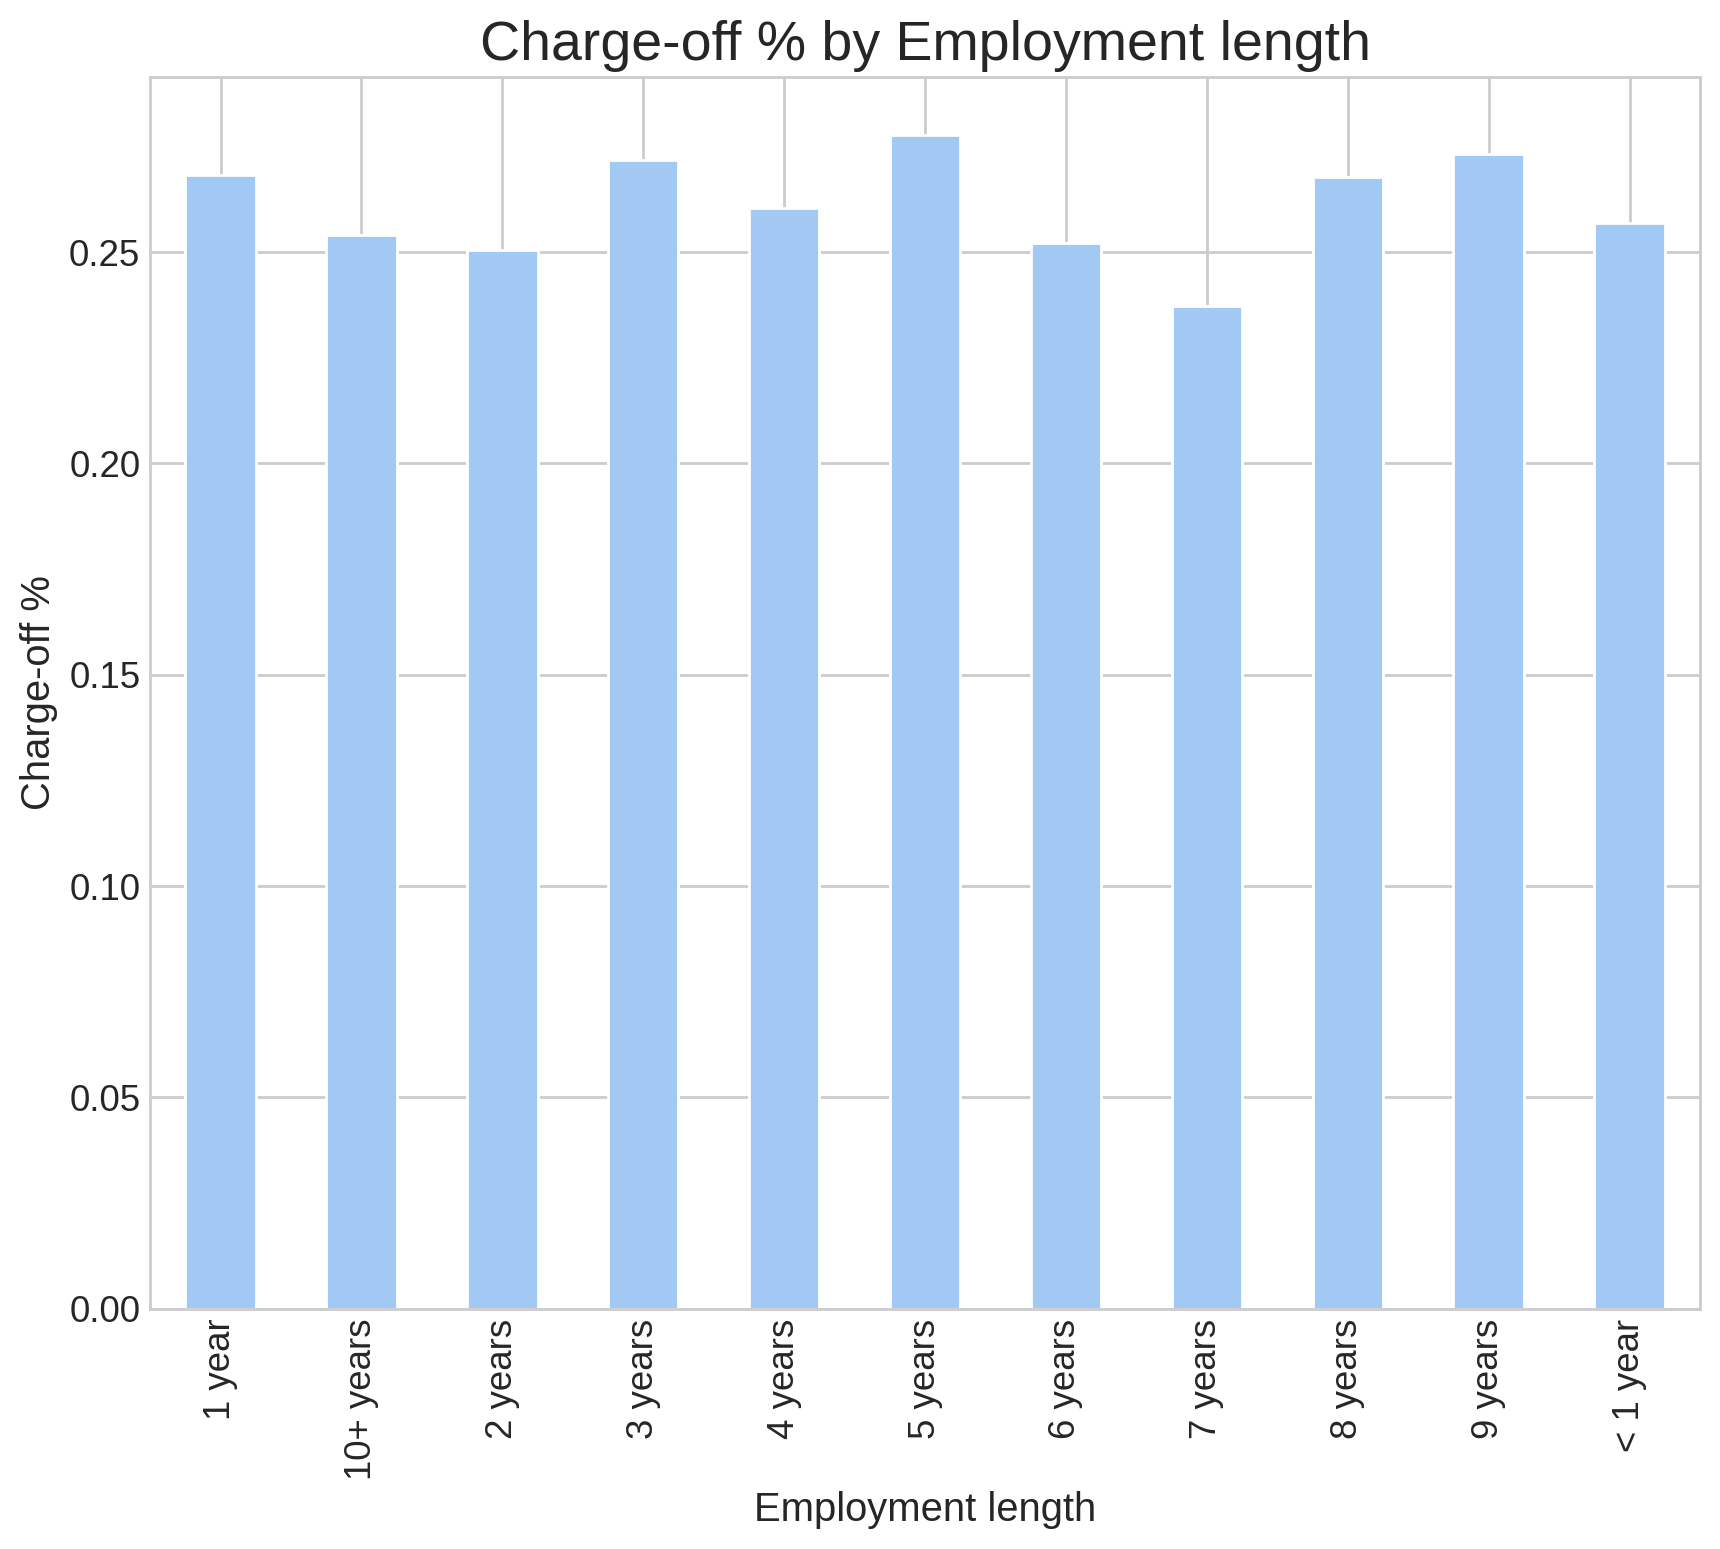

In [ ]:
# Visualizing emp_length charge-off rates

co = df_trim[df_trim['loan_status'] == 0]['emp_length'].value_counts() / df_trim[df_trim['loan_status'] == 1]['emp_length'].value_counts()

fig, ax =plt.subplots(figsize=(10,8))

ax.tick_params(axis='x', labelrotation=0)
ax.set(xlabel='Employment length', ylabel='Charge-off %')
ax.set_title('Charge-off % by Employment length', size=20)

co.plot.bar()

In [ ]:
#Dropping emp_length feature

df_trim=df_trim.drop(["emp_length"],axis=1)

In [ ]:
# Variance threshold evaluation

check=df_trim.copy()
check.fillna("None")
ord_enc = OrdinalEncoder()
check[["addr_state","home_ownership","purpose","sub_grade","grade","term"]]= ord_enc.fit_transform(check[["addr_state",
                                                                                                          "home_ownership",
                                                                                                          "purpose",
                                                                                                          "sub_grade",
                                                                                                          "grade",
                                                                                                          "term"]])
var_thr = VarianceThreshold(threshold = 0.15)  #Dropping columns that are 85% or more similar
var_thr.fit(check)
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# Returning low variance columns

concol = [column for column in check.columns
          if column not in check.columns[var_thr.get_support()]]

for features in concol:
    print(features)

In [ ]:
# Dropping pub_rec_bankruptcies feature

df_trim=df_trim.drop(["pub_rec_bankruptcies"],axis=1)

In [ ]:
# Selecting all the numeric features from the Dataframe

num=df_trim.select_dtypes(include=["float64"]).columns
num

Index(['annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'installment',
       'int_rate', 'loan_amnt', 'mort_acc', 'open_acc', 'revol_util',
       'total_acc'],
      dtype='object')

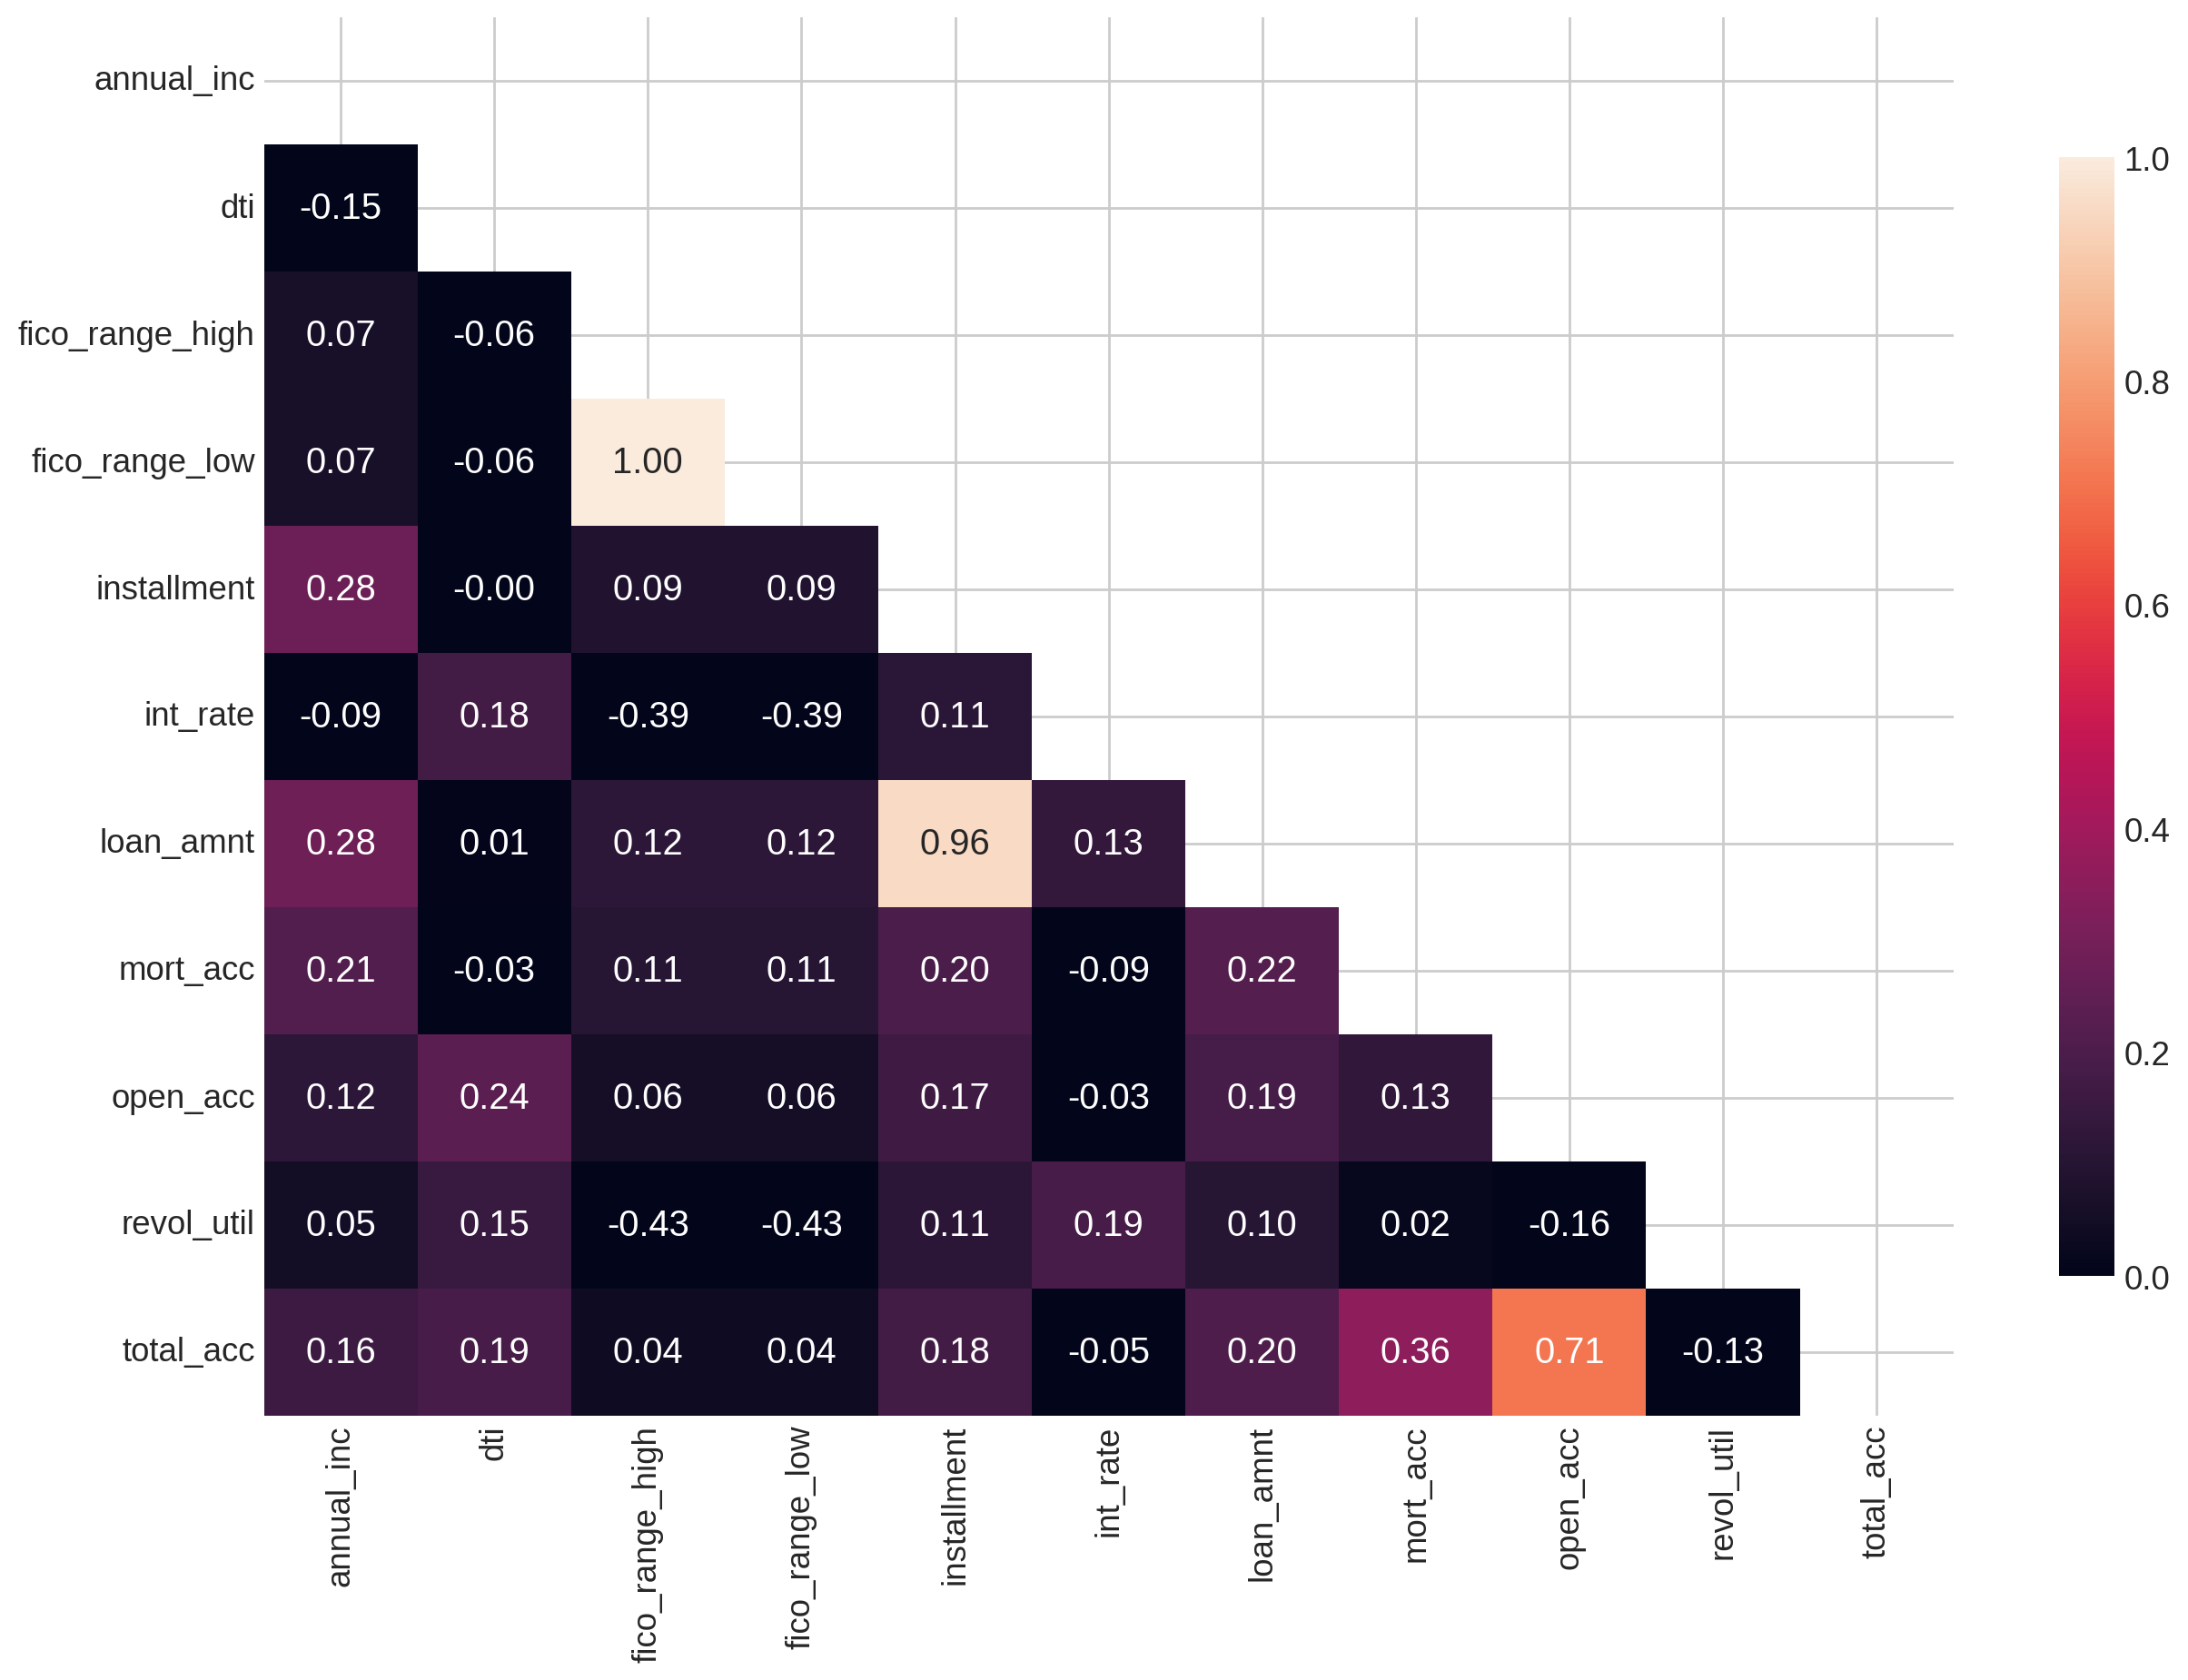

In [ ]:
 #Numeric features correlation heatmap

corr=df_trim.loc[:,df_trim.columns!="loan_status"].corr()
mask= np.triu(np.ones_like(corr,dtype=np.bool))
fig,ax= plt.subplots(figsize=(15,10))
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
None

<Axes: title={'center': 'Installment vs Loan amount'}, xlabel='Installment in USD', ylabel='Loan amount in USD'>

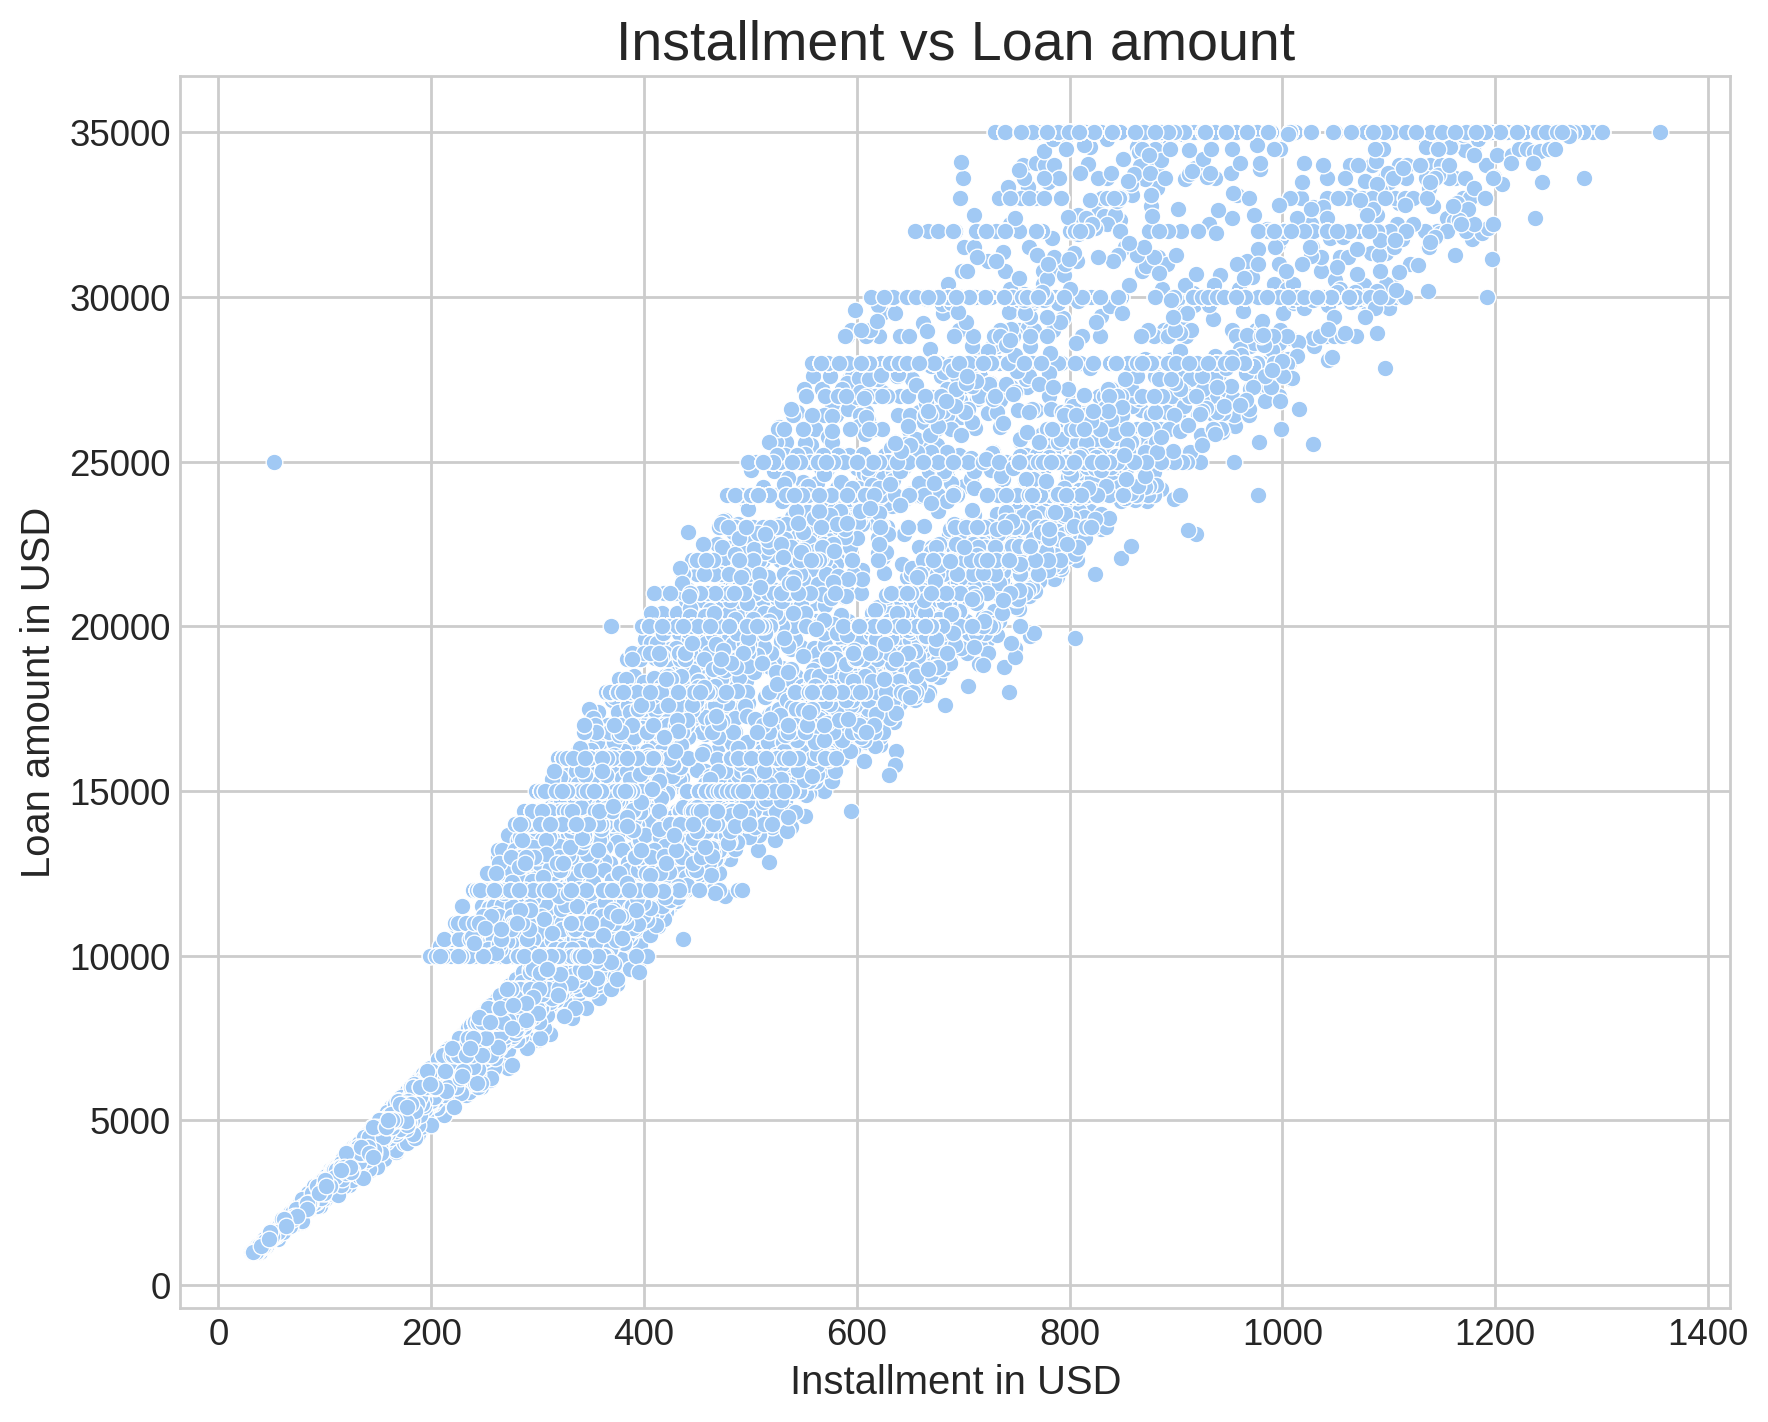

In [ ]:
# Installment vs loan amount scatterplot visualization

fig, ax =plt.subplots(figsize=(10,8))

ax.tick_params(axis='x', labelrotation=0)
ax.set(xlabel='Installment in USD', ylabel='Loan amount in USD')
ax.set_title('Installment vs Loan amount', size=20)

sns.scatterplot(x='installment', y='loan_amnt', data=df_trim)

In [ ]:
# Creating FICO score average collumn
df_trim["fico_avg"]=(df_trim["fico_range_high"]+df_trim["fico_range_low"])/2

# Dropping FICO score(low and high) and loan_amnt features from the Dataframe
df_trim=df_trim.drop(["fico_range_high","fico_range_low","loan_amnt"],axis=1)

In [ ]:
# Selecting categorial features

cat=df_trim.select_dtypes(include=['object']).columns
cat

Index(['addr_state', 'grade', 'home_ownership', 'purpose', 'sub_grade',
       'term'],
      dtype='object')

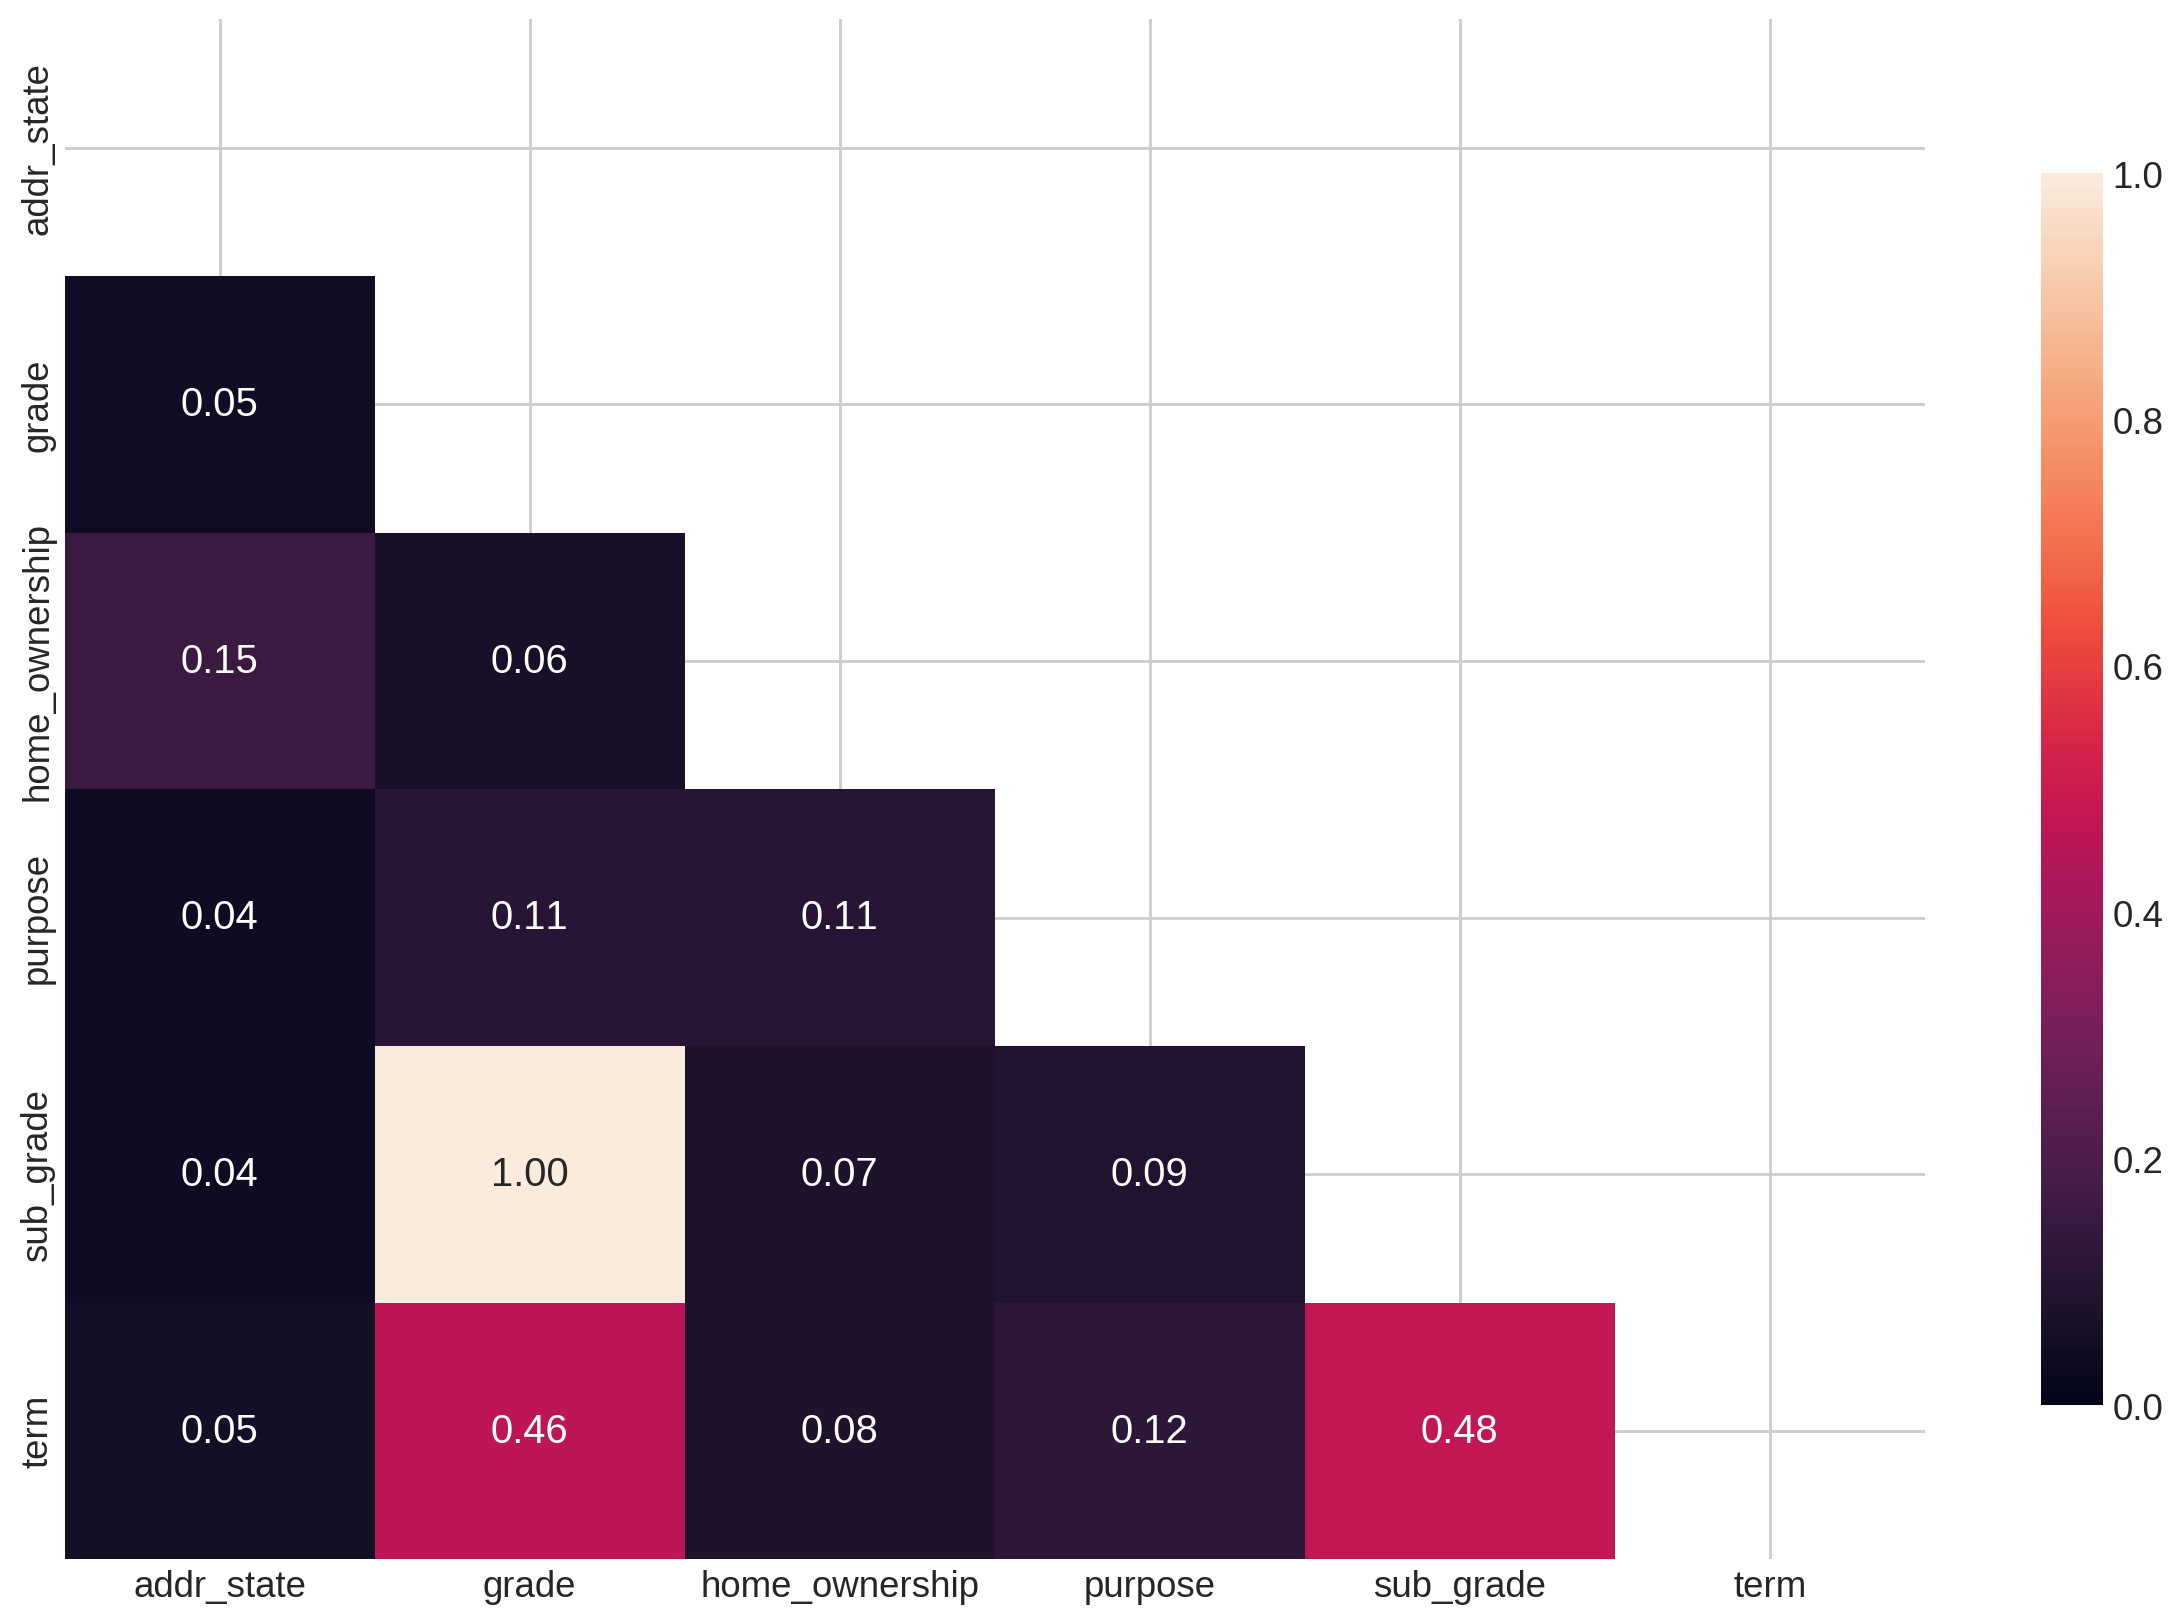

In [ ]:
# Applying Cramer's V and generating a correlation heatmap of the categorical features

c=df_trim[cat]

c = c.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

cramersv = am.CramersV(c)

corr=cramersv.fit()

fig,ax= plt.subplots(figsize=(15,10))
mask= np.triu(np.ones_like(corr,dtype=np.bool))
sns.heatmap(corr,mask=mask ,annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
None

In [ ]:
# Dropping grade feature

df_trim=df_trim.drop(["grade"],axis=1)

In [ ]:
# Calculating current feature count

len(df_trim.columns)

15

In [ ]:
# Separating the target from the features

y=df_trim["loan_status"]
X=df_trim.drop(['loan_status'],axis=1)

In [ ]:
X

,addr_state,annual_inc,dti,home_ownership,installment,int_rate,mort_acc,open_acc,purpose,revol_util,sub_grade,term,total_acc,fico_avg
0,PA,55000.0,5.91,MORTGAGE,123.03,13.99,1.0,7.0,debt_consolidation,29.7,C4,36 months,13.0,677.0
1,SD,65000.0,16.06,MORTGAGE,820.28,11.99,4.0,22.0,small_business,19.2,C1,36 months,38.0,717.0
2,IL,63000.0,10.78,MORTGAGE,432.66,10.78,5.0,6.0,home_improvement,56.2,B4,60 months,18.0,697.0
4,PA,104433.0,25.37,MORTGAGE,289.91,22.45,6.0,12.0,major_purchase,64.5,F1,60 months,35.0,697.0
5,GA,34000.0,10.20,RENT,405.18,13.44,0.0,5.0,debt_consolidation,68.4,C3,36 months,6.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37527,VT,71000.0,14.96,MORTGAGE,427.84,7.89,3.0,9.0,debt_consolidation,54.3,A5,36 months,20.0,692.0
37528,NY,110000.0,15.56,MORTGAGE,352.77,14.48,1.0,26.0,home_improvement,18.0,C5,60 months,32.0,677.0
37529,TX,165000.0,11.69,MORTGAGE,323.45,10.64,1.0,13.0,home_improvement,28.4,B4,60 months,27.0,752.0
37530,VA,60000.0,11.49,RENT,225.44,12.59,0.0,12.0,credit_card,38.6,C2,60 months,15.0,702.0


In [ ]:
# Encoding Feature Selection dengan One Hot Encoder

OH = pd.get_dummies(X[['addr_state',  'home_ownership', 'purpose', 'sub_grade','term']], drop_first=True)

X=X.drop(['addr_state', 'home_ownership', 'purpose', 'sub_grade','term'],axis=1)

X = pd.concat([X,OH],axis=1)

In [ ]:
X

,annual_inc,dti,installment,int_rate,mort_acc,open_acc,revol_util,total_acc,fico_avg,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_ 60 months
0,55000.0,5.91,123.03,13.99,1.0,7.0,29.7,13.0,677.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,65000.0,16.06,820.28,11.99,4.0,22.0,19.2,38.0,717.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,63000.0,10.78,432.66,10.78,5.0,6.0,56.2,18.0,697.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,104433.0,25.37,289.91,22.45,6.0,12.0,64.5,35.0,697.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,34000.0,10.20,405.18,13.44,0.0,5.0,68.4,6.0,692.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37527,71000.0,14.96,427.84,7.89,3.0,9.0,54.3,20.0,692.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37528,110000.0,15.56,352.77,14.48,1.0,26.0,18.0,32.0,677.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
37529,165000.0,11.69,323.45,10.64,1.0,13.0,28.4,27.0,752.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
37530,60000.0,11.49,225.44,12.59,0.0,12.0,38.6,15.0,702.0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# Total list of columns after OHE

X.columns.to_list()

['annual_inc',
 'dti',
 'installment',
 'int_rate',
 'mort_acc',
 'open_acc',
 'revol_util',
 'total_acc',
 'fico_avg',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY',
 'home_ownership

In [ ]:
# Melakukan Split Dataset diantara Data Training dengan Data Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=29)

In [ ]:
# Melakuklan MixMax Scaler pada Dataset untuk standarisasi

scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Calculating the shape of the training set

X_train.shape

(26425, 106)

In [ ]:
# Melakukan pengujian atas split train data dengan test data

bm= DummyClassifier(random_state = 0)
bm.fit(X_train,y_train)
score_bm=bm.score(X_test, y_test)

print("\n\nAccuracy dari percobaan model : " + str(score_bm) + " %")



Accuracy dari percobaan model : 0.7973361586196458 %


In [ ]:
# Making predictions with the Baseline model

predictions = (bm.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1339
           1       0.80      1.00      0.89      5268

    accuracy                           0.80      6607
   macro avg       0.40      0.50      0.44      6607
weighted avg       0.64      0.80      0.71      6607



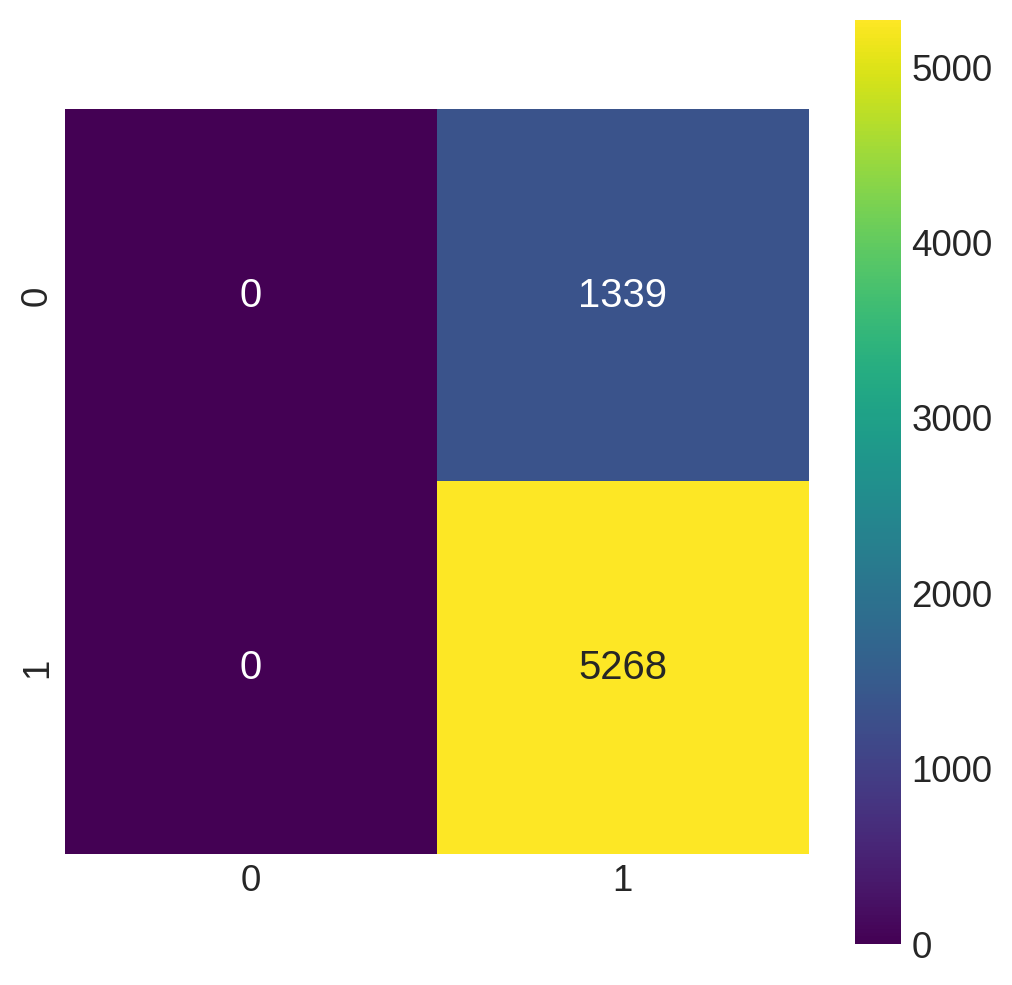

In [ ]:
# Cofusion Matrix (Baseline model predictions)

cm = confusion_matrix(y_test,predictions)
fig, ax =plt.subplots(figsize=(6,6))
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

In [ ]:
# Defining the input shape thats going to be fed to the ANN model

input_shape=len(X.columns)

In [ ]:
# Model Struktur ANN dengan 4 lapisan sigmoid

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
# Mengkompile model, mendefinisikan optimizer, loss dan metrik target

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
# Menggunakan Early Stoping untuk fitting callback dari model

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=300,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/1000
89/89 [==============================] - 4s 23ms/step - loss: 0.4798 - binary_accuracy: 0.7880 - val_loss: 0.4476 - val_binary_accuracy: 0.7973
Epoch 2/1000
89/89 [==============================] - 2s 22ms/step - loss: 0.4528 - binary_accuracy: 0.7953 - val_loss: 0.4474 - val_binary_accuracy: 0.8046
Epoch 3/1000
89/89 [==============================] - 2s 26ms/step - loss: 0.4493 - binary_accuracy: 0.8021 - val_loss: 0.4468 - val_binary_accuracy: 0.8032
Epoch 4/1000
89/89 [==============================] - 4s 47ms/step - loss: 0.4464 - binary_accuracy: 0.8028 - val_loss: 0.4458 - val_binary_accuracy: 0.8040
Epoch 5/1000
89/89 [==============================] - 4s 50ms/step - loss: 0.4410 - binary_accuracy: 0.8035 - val_loss: 0.4500 - val_binary_accuracy: 0.8002
Epoch 6/1000
89/89 [==============================] - 4s 41ms/step - loss: 0.4378 - binary_accuracy: 0.8065 - val_loss: 0.4473 - val_binary_accuracy: 0.8022
Epoch 7/1000
89/89 [==============================] - 5s 5

Best Validation Loss: 0.4458
Best Validation Accuracy: 0.8046


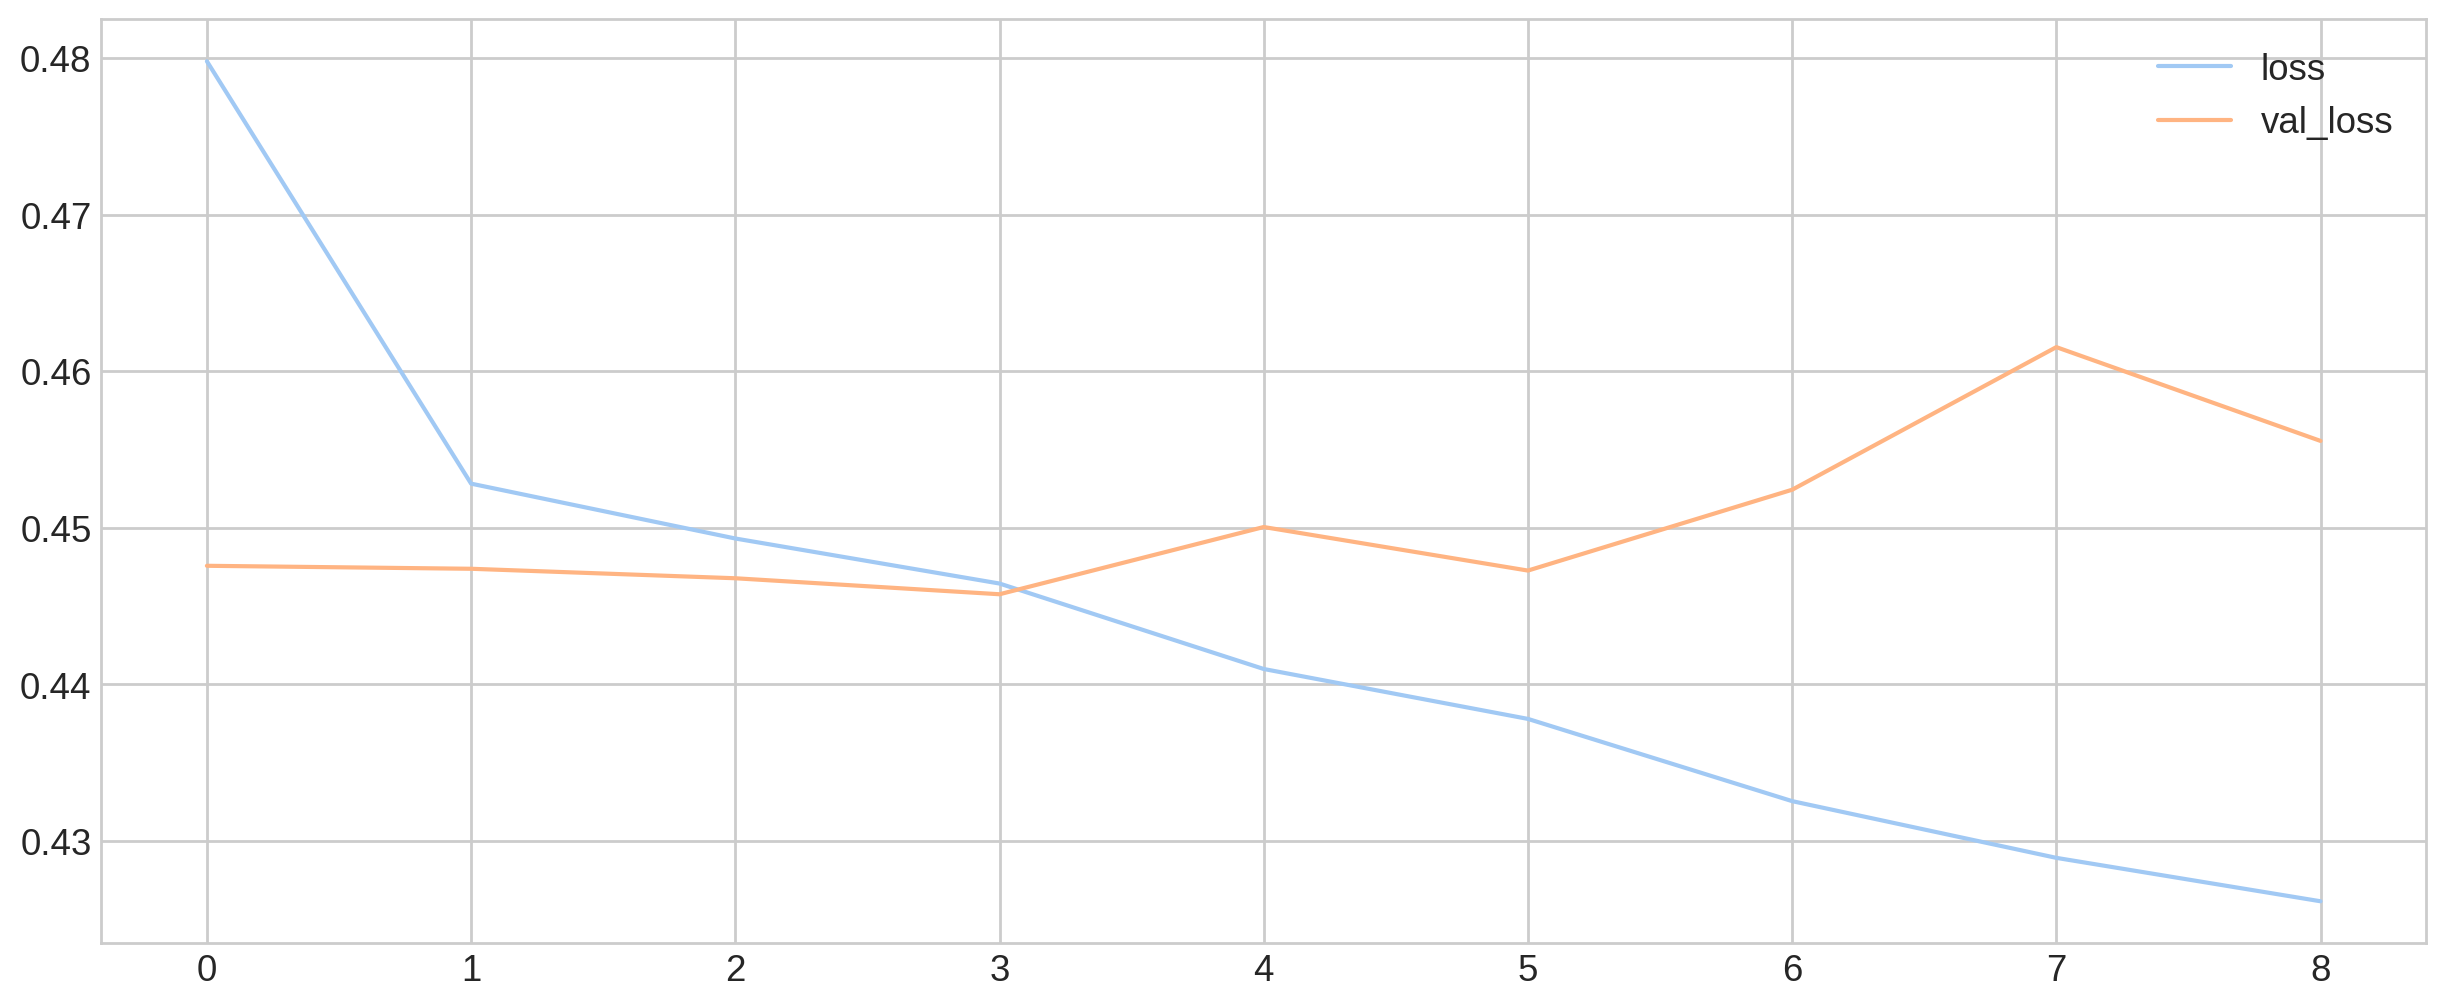

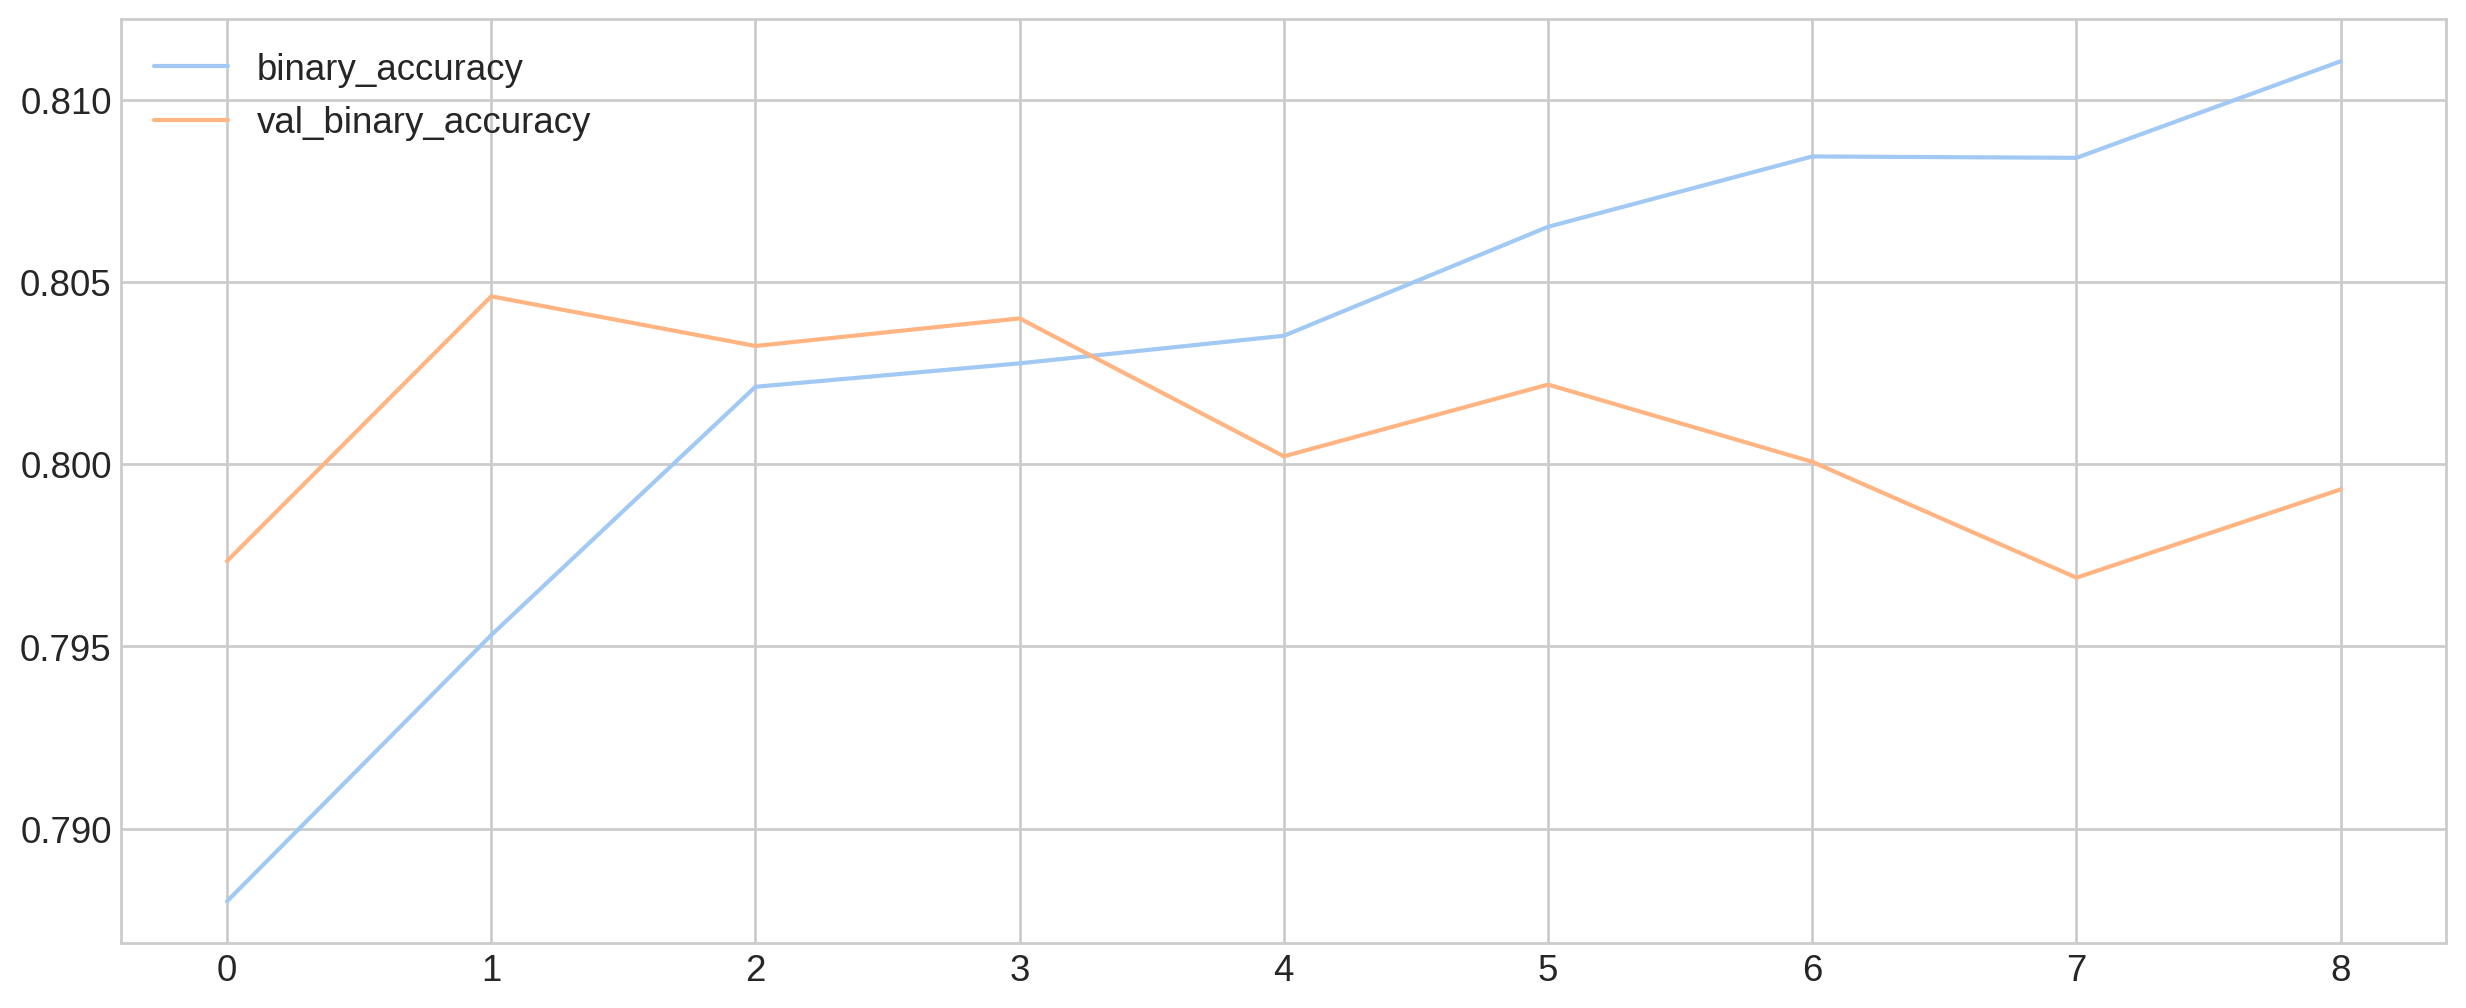

In [ ]:
# Plotting Evaluasi performance curves for the ANN model

history_df = pd.DataFrame(history.history)


history_df.loc[0:, ['loss', 'val_loss']].plot(figsize=(15,6))
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot(figsize=(15,6))

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [ ]:
# Membuat Prediksi pada modeling ANN (Sigmoid function threshold >50%)

predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

207/207 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.58      0.12      0.19      1339
           1       0.81      0.98      0.89      5268

    accuracy                           0.80      6607
   macro avg       0.70      0.55      0.54      6607
weighted avg       0.77      0.80      0.75      6607



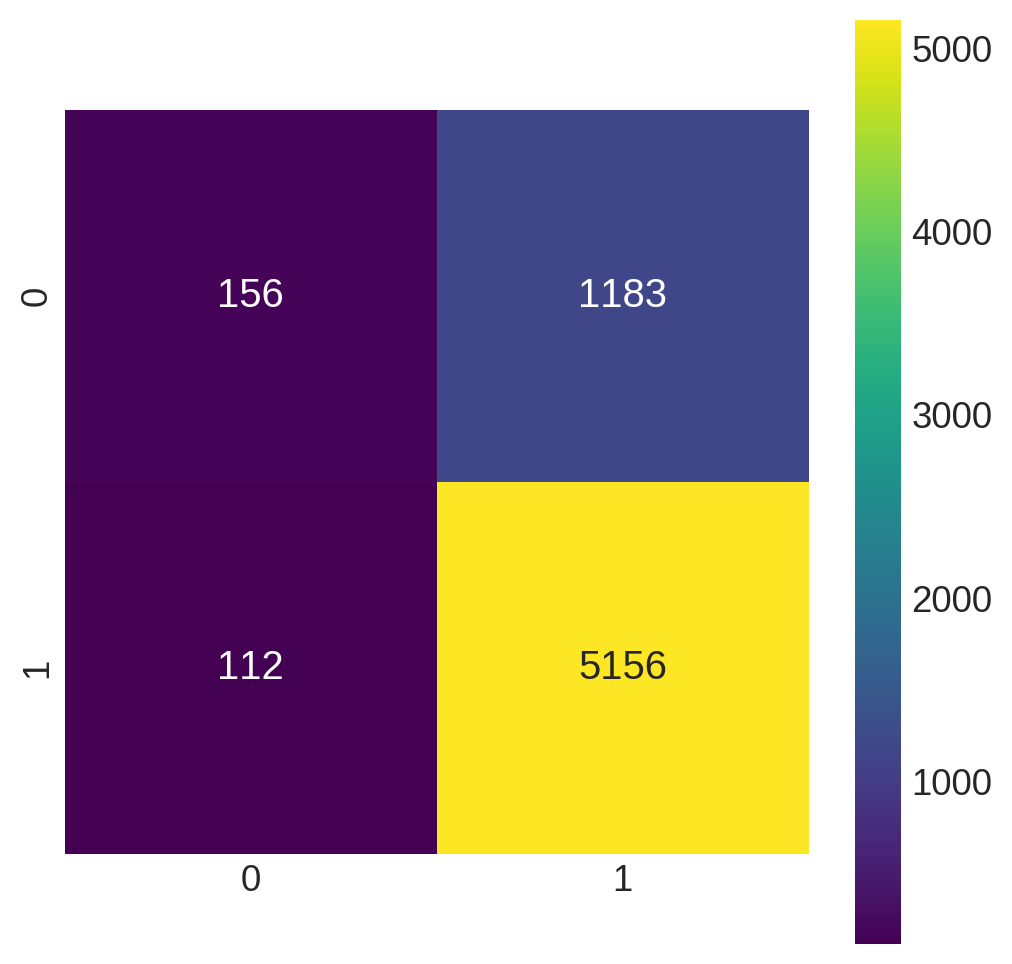

In [ ]:
 #Confusion Matrix for ANN model (Sigmoid function threshold >50%)

cm = confusion_matrix(y_test,predictions)
fig, ax =plt.subplots(figsize=(6,6))
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

In [ ]:
# Membuat Prediksi dengan Model ANN (Sigmoid function threshold >70%)

predictions = (model.predict(X_test) > 0.7).astype("int32")
print(classification_report(y_test,predictions))

207/207 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.43      0.47      0.45      1339
           1       0.86      0.84      0.85      5268

    accuracy                           0.77      6607
   macro avg       0.65      0.66      0.65      6607
weighted avg       0.77      0.77      0.77      6607



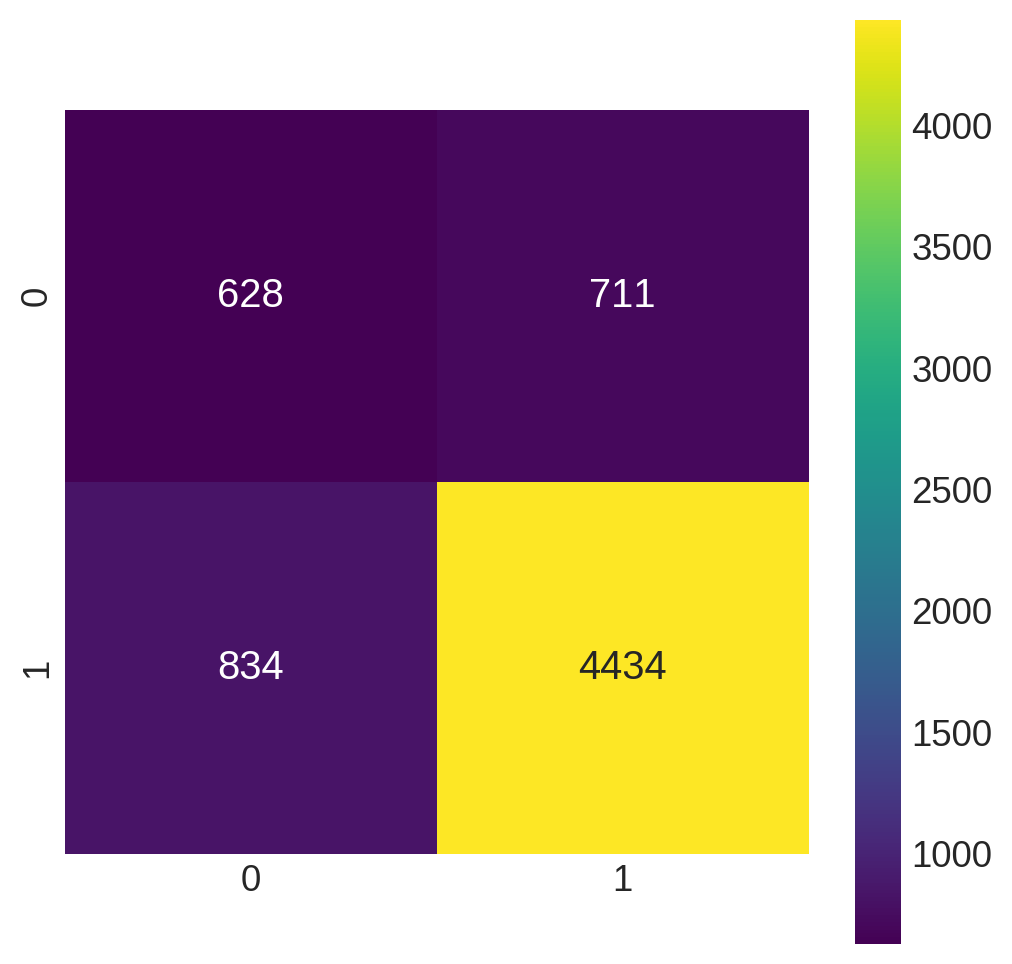

In [ ]:
# Confusion Matrix for ANN model (Sigmoid function threshold >70%)

cm = confusion_matrix(y_test,predictions)
fig, ax =plt.subplots(figsize=(6,6))
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

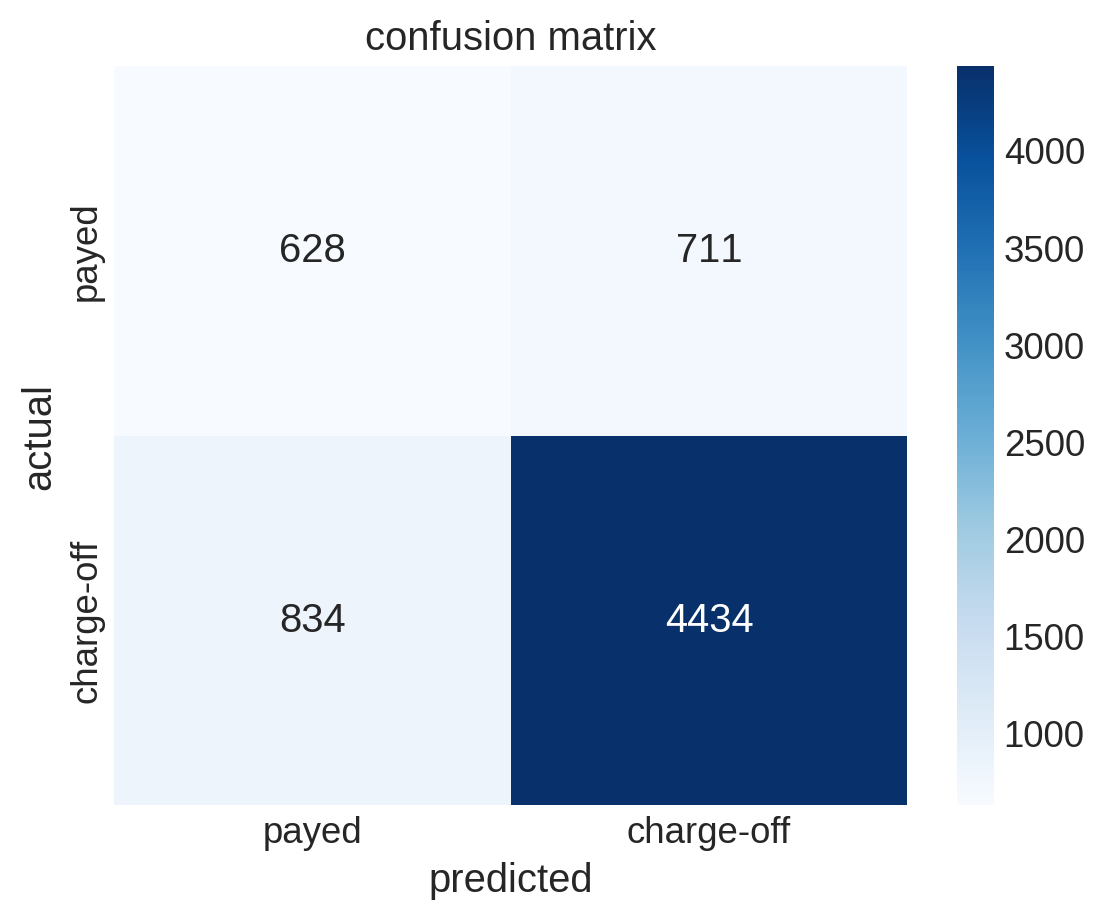

In [ ]:
labels = ["payed", "charge-off"]

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()


